In [2]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
import os as os

In [3]:
#Extra Headers:
import random
import multiprocessing
from joblib import Parallel, delayed
import time
import math
import platform
import CoreFunctions as cf

In [4]:
PlotWidthIn = 11
PlotHeightIn = 3.75
PlotDPI = 120
num_cores = multiprocessing.cpu_count()-2

In [5]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

In [6]:
if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'
    

if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/scr10/dchendrickson01/Recordings2/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder + "Recordings2\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "Recordings2\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'Recordings2/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'Recordings2\\'

In [7]:
Cleanup = False
if Cleanup:
    files = os.listdir(folder+'cc\\')

    AFw = open(folder+'cc\\'+files[0][:-5]+'csv','x')

    for file in files:
        print(file)
        AF = open(folder+'cc\\'+file,'r')
        while(True):
            line = AF.readline()
            if not line:
                break;
            else:
                AFw.write(line)
        AF.close()

    AFw.close()


In [8]:
Checking = False
if Checking:
    files = os.listdir(folder+'cc\\')
    for file in files:
        a=np.genfromtxt(open(folder+'cc\\'+file,'r'), delimiter=',',
                skip_header=1, missing_values=0)

In [13]:
capturingFails = False
def getData(file):
    #try:
    dataSet = np.genfromtxt(open(folder+file,'r'), delimiter=',',
                skip_header=0, missing_values=0,)
    
    '''except:
        print(file)
        if capturingFails:
            AF = open(folder+file,'r')
            i = 0
            j = 0
            AFw = open(folder+file[:-3]+str(j)+'.csv','x')
            while(True):
                line = AF.readline()
                if not line:
                    break;
                else:
                    i+=1
                    AFw.write(line)
                if i%1000000 == 0:
                    AFw.close()
                    j+=1
                    AFw = open(folder+file[:-3]+str(j)+'.csv','x')
            AFw.close()
            AF.close
        dataSet = [[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]]
        '''
    return dataSet

In [14]:
files = os.listdir(folder)

In [15]:
AllData = Parallel(n_jobs=num_cores)(delayed(getData)(file) for file in files)

In [30]:
averages = []
stdDevs = []
minimums = []
maximums = []

for sets in AllData:
    av = []
    sd = []
    mi = []
    ma = []
    for j in range(3):
        i = j + 3
        aver = np.average(sets[:,i])
        av.append(aver)
        sets[:,i]-=aver
        sd.append(np.std(sets[:,i]))
        mi.append(np.min(sets[:,i]))
        ma.append(np.max(sets[:,i]))
    averages.append(av)
    stdDevs.append(sd)
    minimums.append(mi)
    maximums.append(ma)
    

In [35]:
np.matrix(maximums)

matrix([[0.78701847, 1.28886278, 0.89280251],
        [0.25400662, 0.57515762, 0.53698393],
        [0.30101083, 0.49557884, 0.53214326],
        [0.74851037, 1.23328946, 1.00641945],
        [0.20828971, 0.41223119, 0.39945616],
        [0.30258825, 0.56471694, 0.75910849],
        [0.74273546, 1.1962569 , 1.04643411],
        [0.31473906, 0.39066575, 0.34407215],
        [0.34910541, 0.561708  , 0.66344207],
        [0.13459927, 0.35816508, 0.34642935],
        [0.34579039, 0.40260103, 0.42248427],
        [0.33767091, 0.89758903, 0.65557576],
        [0.73049415, 1.24079101, 1.0250889 ],
        [0.30276858, 0.56681963, 0.57956842],
        [0.35790986, 0.68312888, 0.41775453],
        [0.14563207, 0.47469481, 0.31349649],
        [0.2595746 , 0.52312595, 0.56407195],
        [0.25959431, 0.43701262, 0.43192322],
        [0.33454012, 0.44972442, 0.51895768]])

In [ ]:
#Smooth type 0 or other is none
#       type 1 is rolling average with SmoothDistance
#       type 2 is low-filter denoise
#       type 3 is Kalman filter


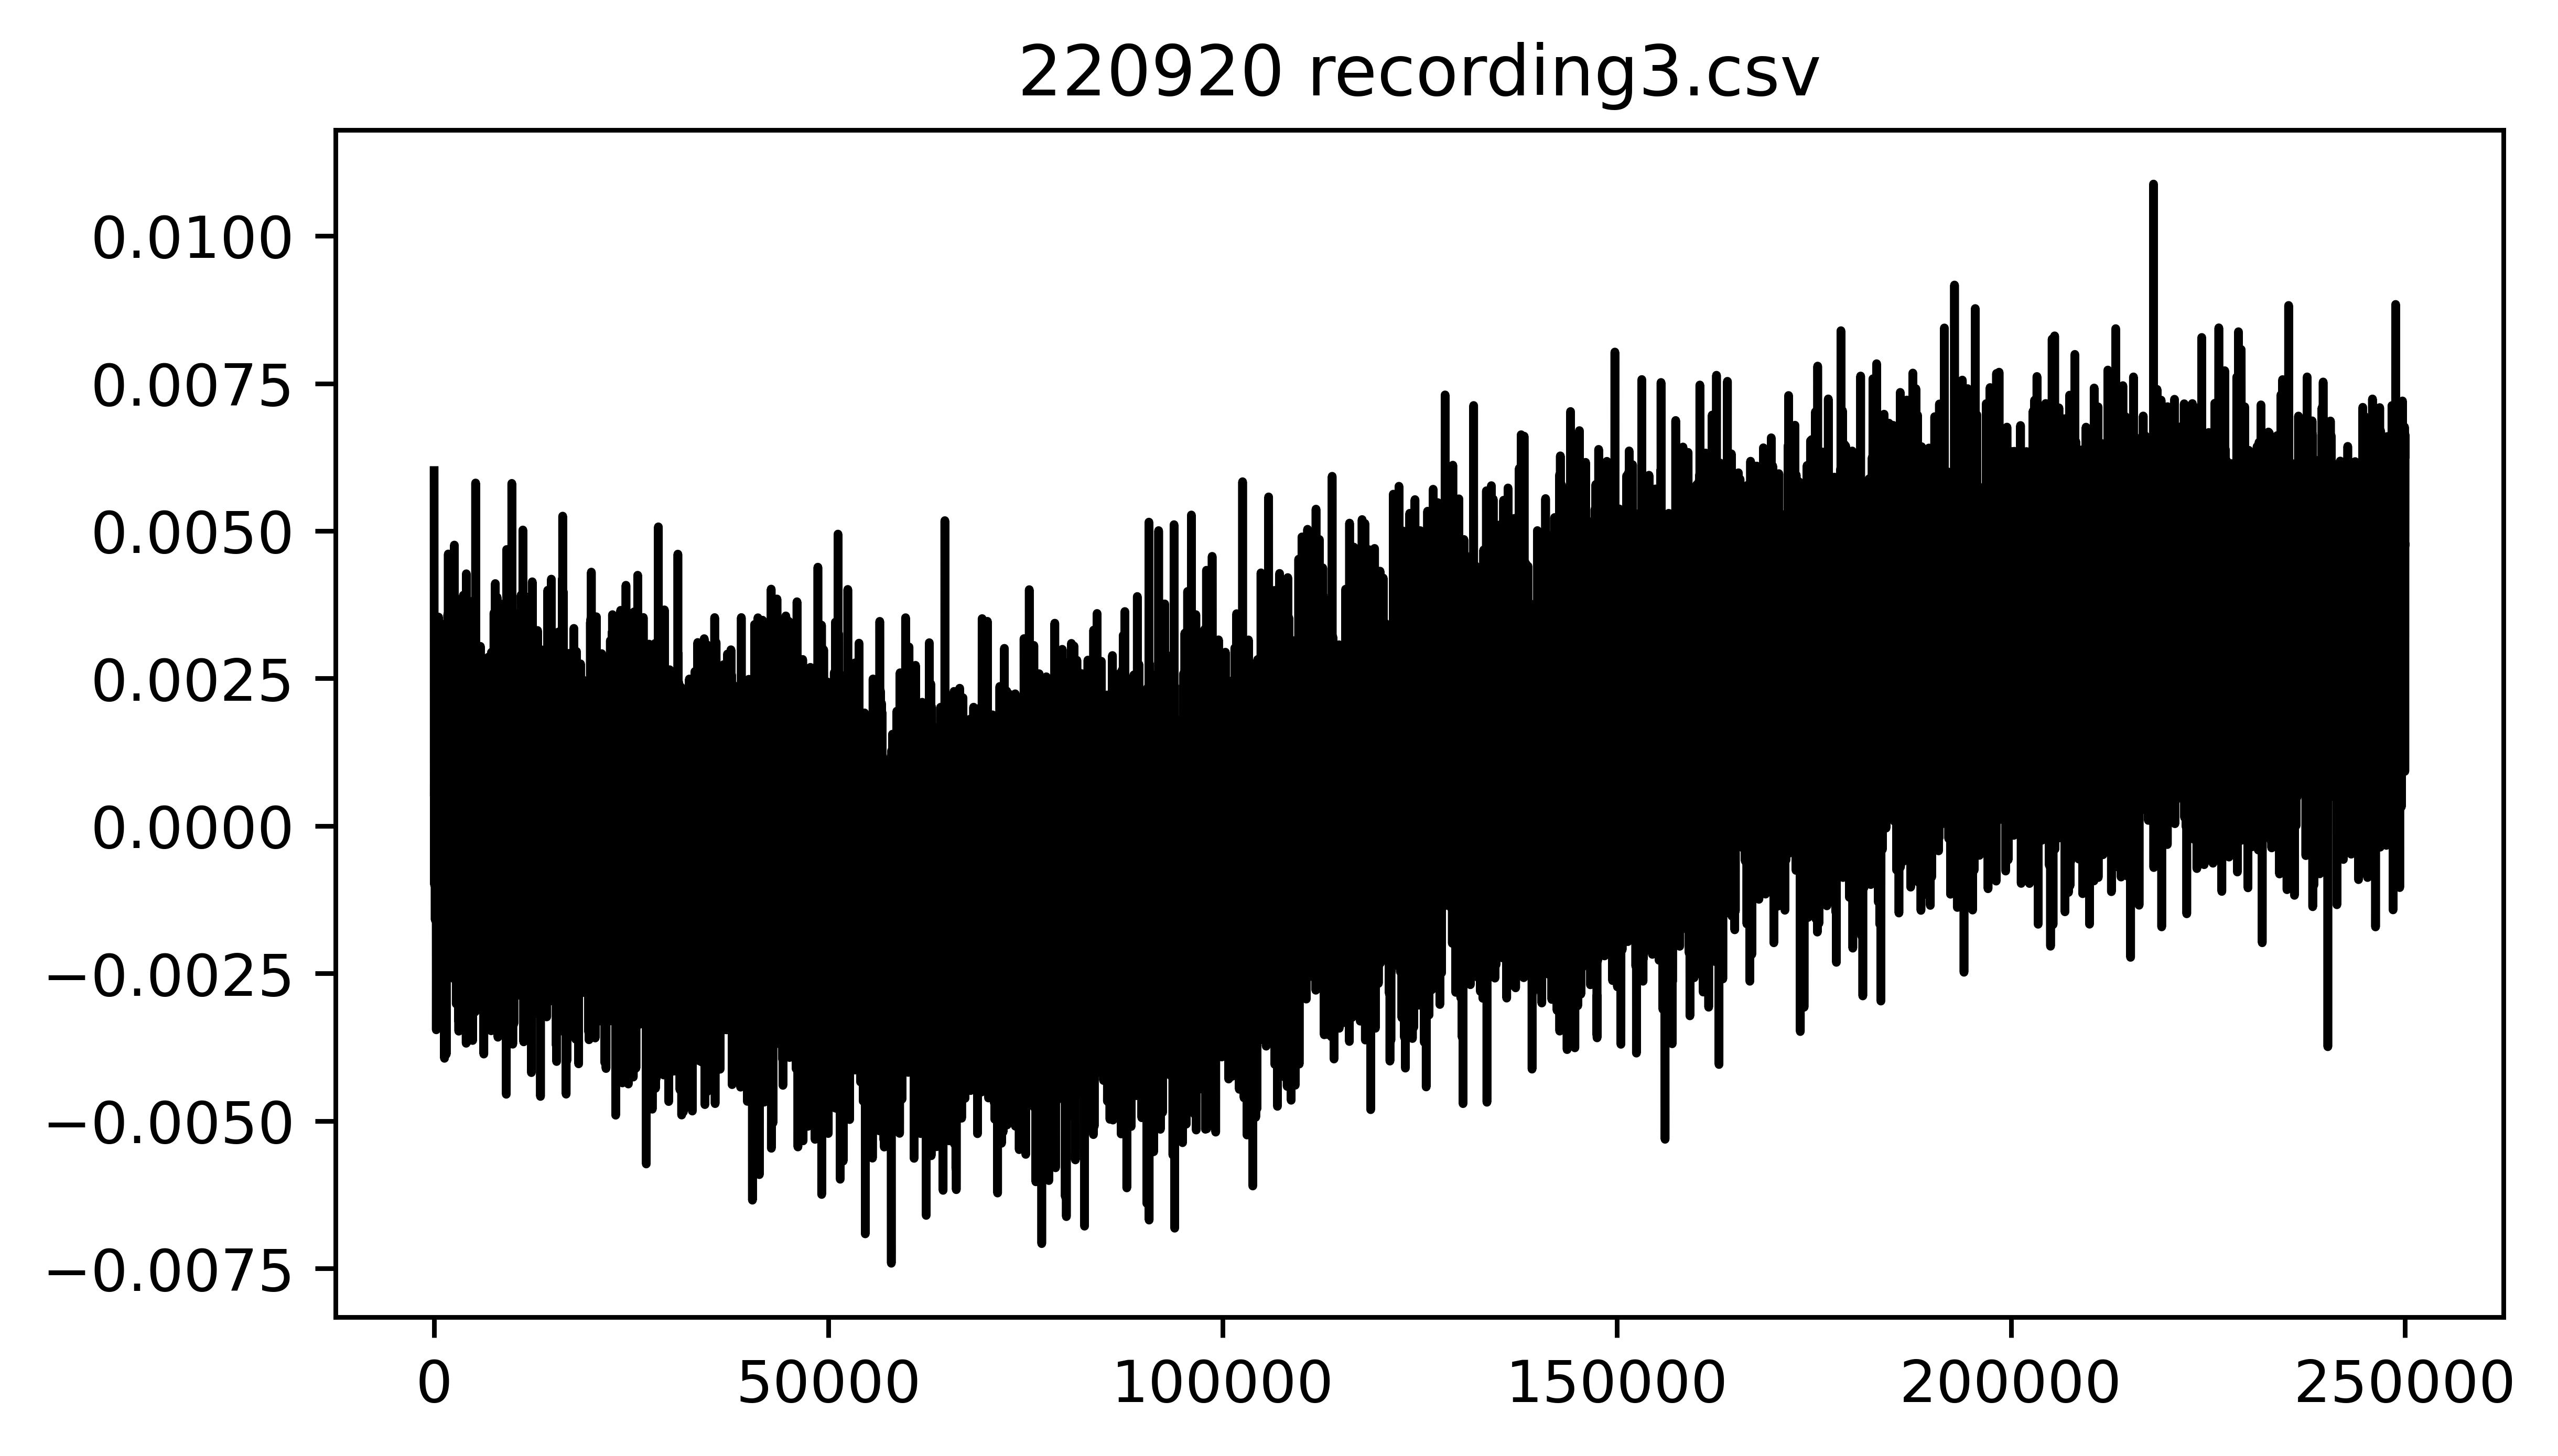

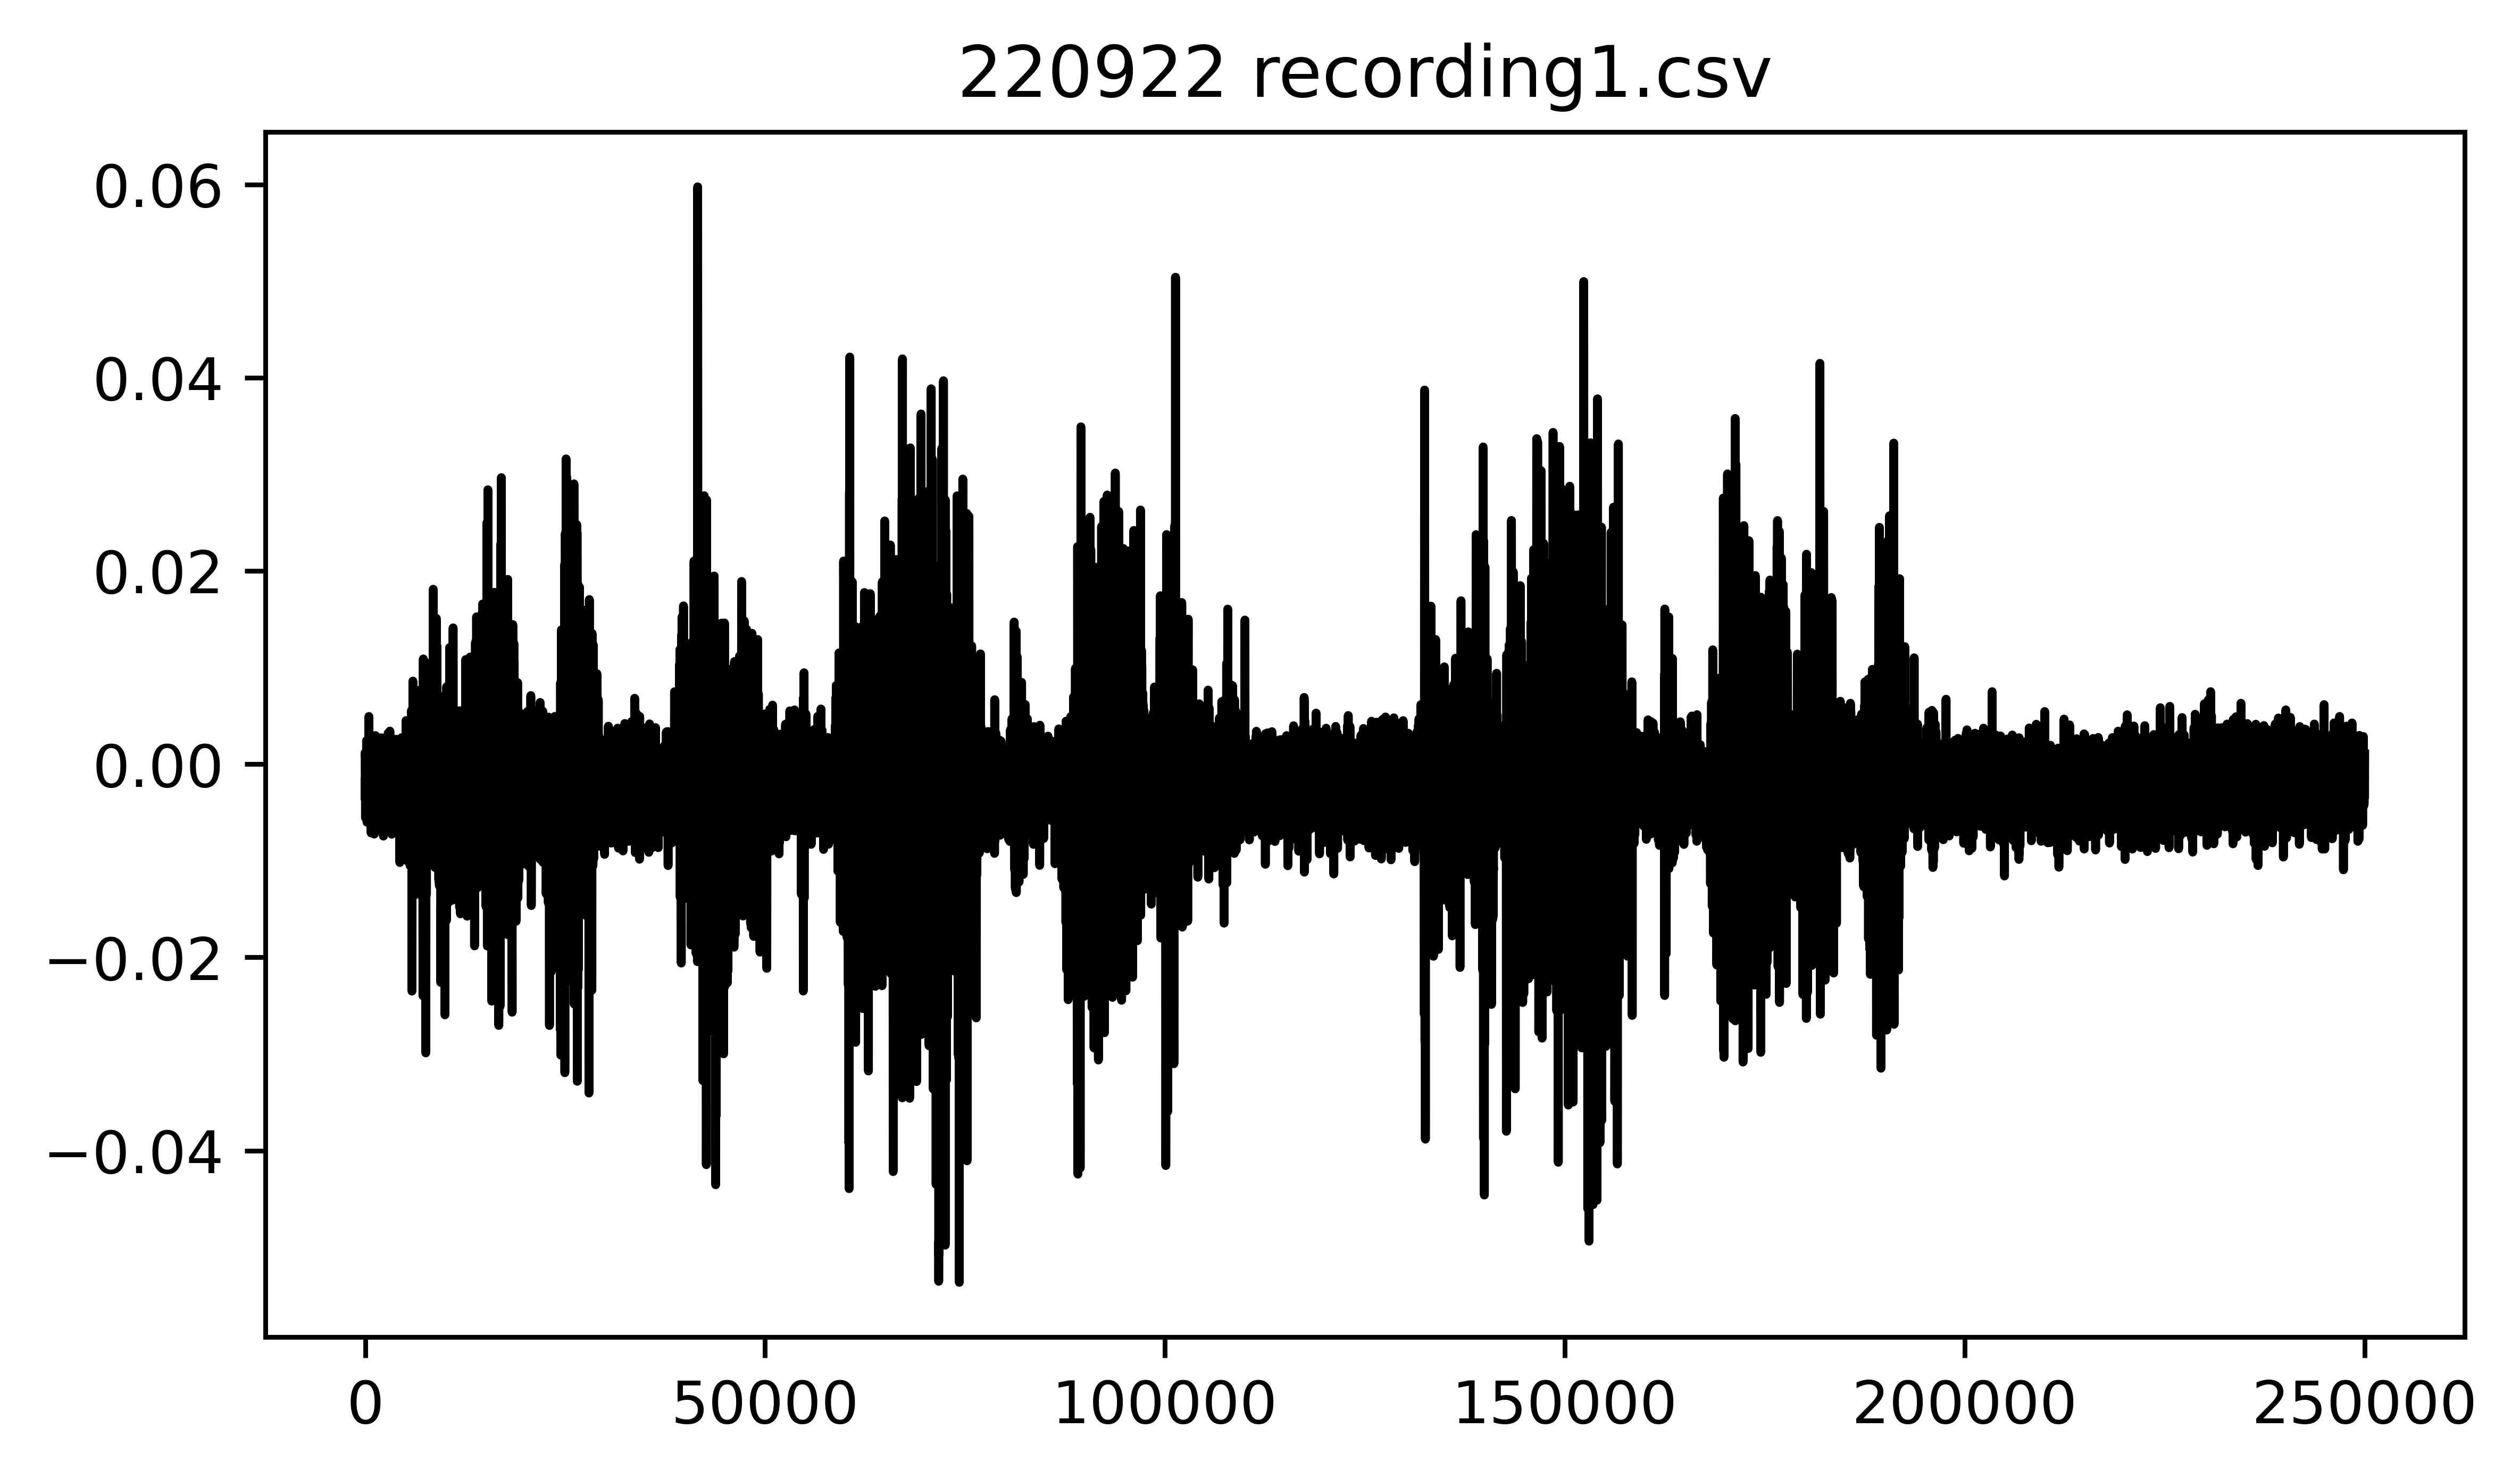

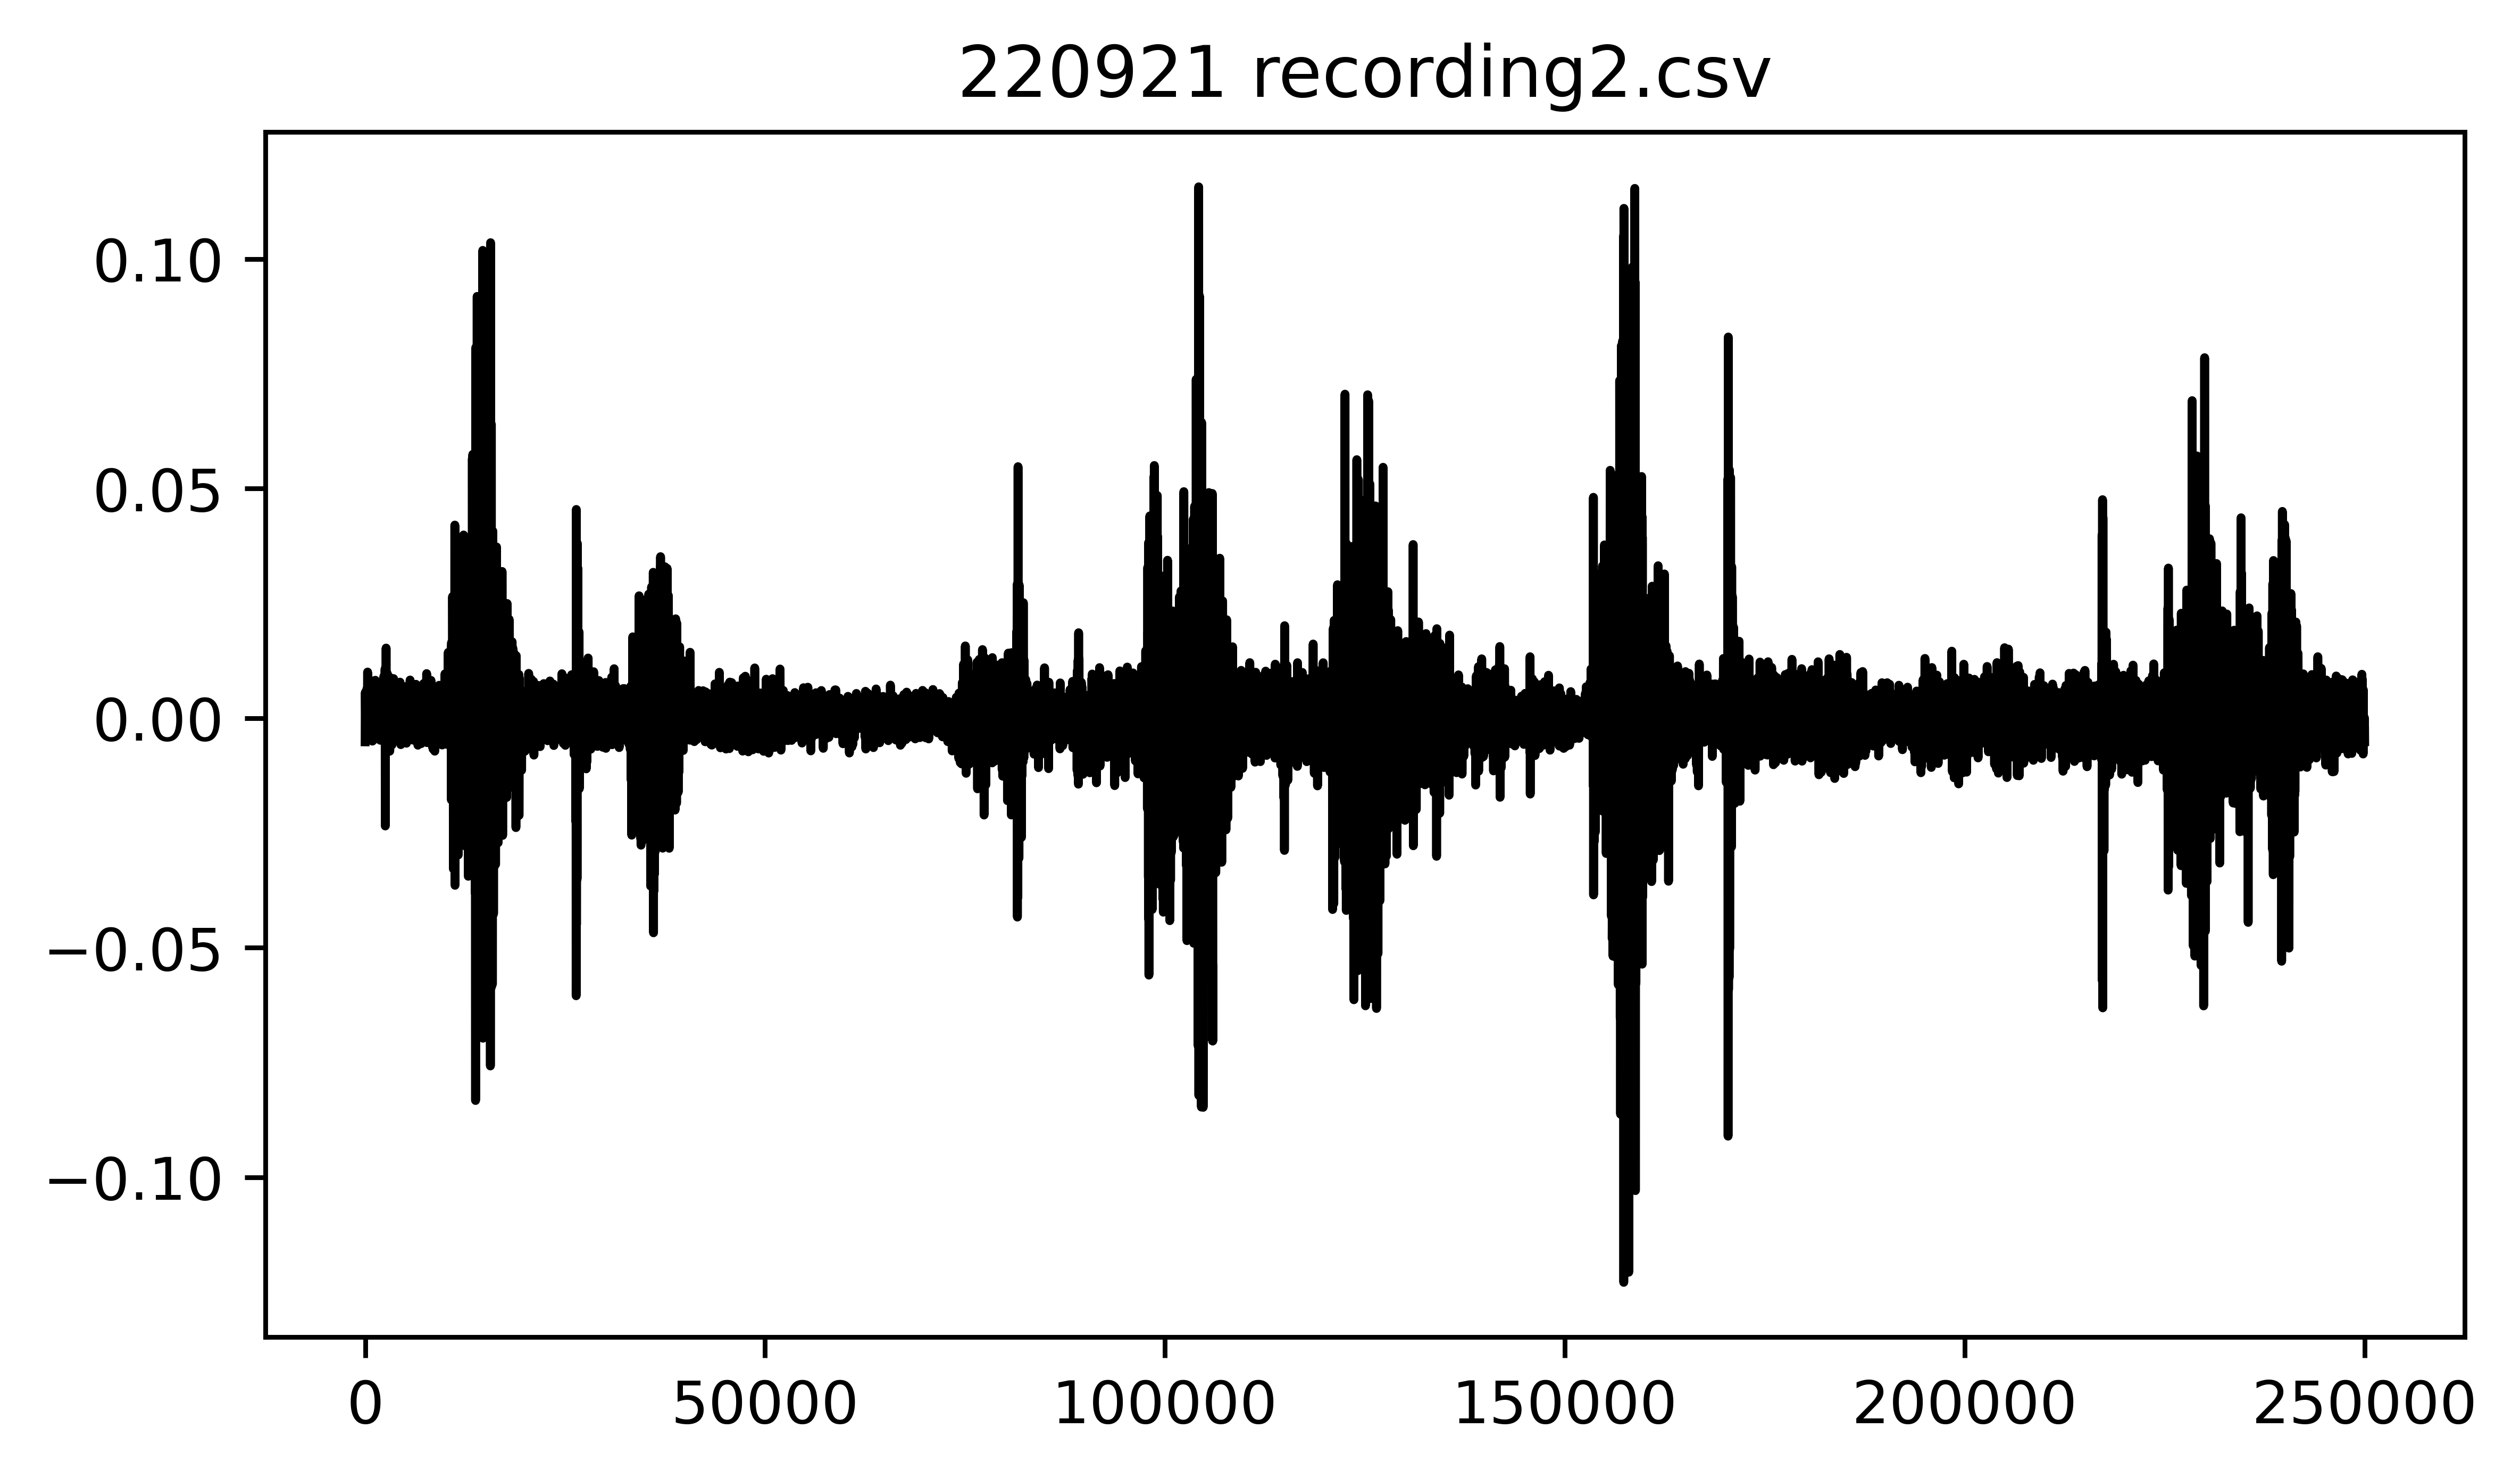

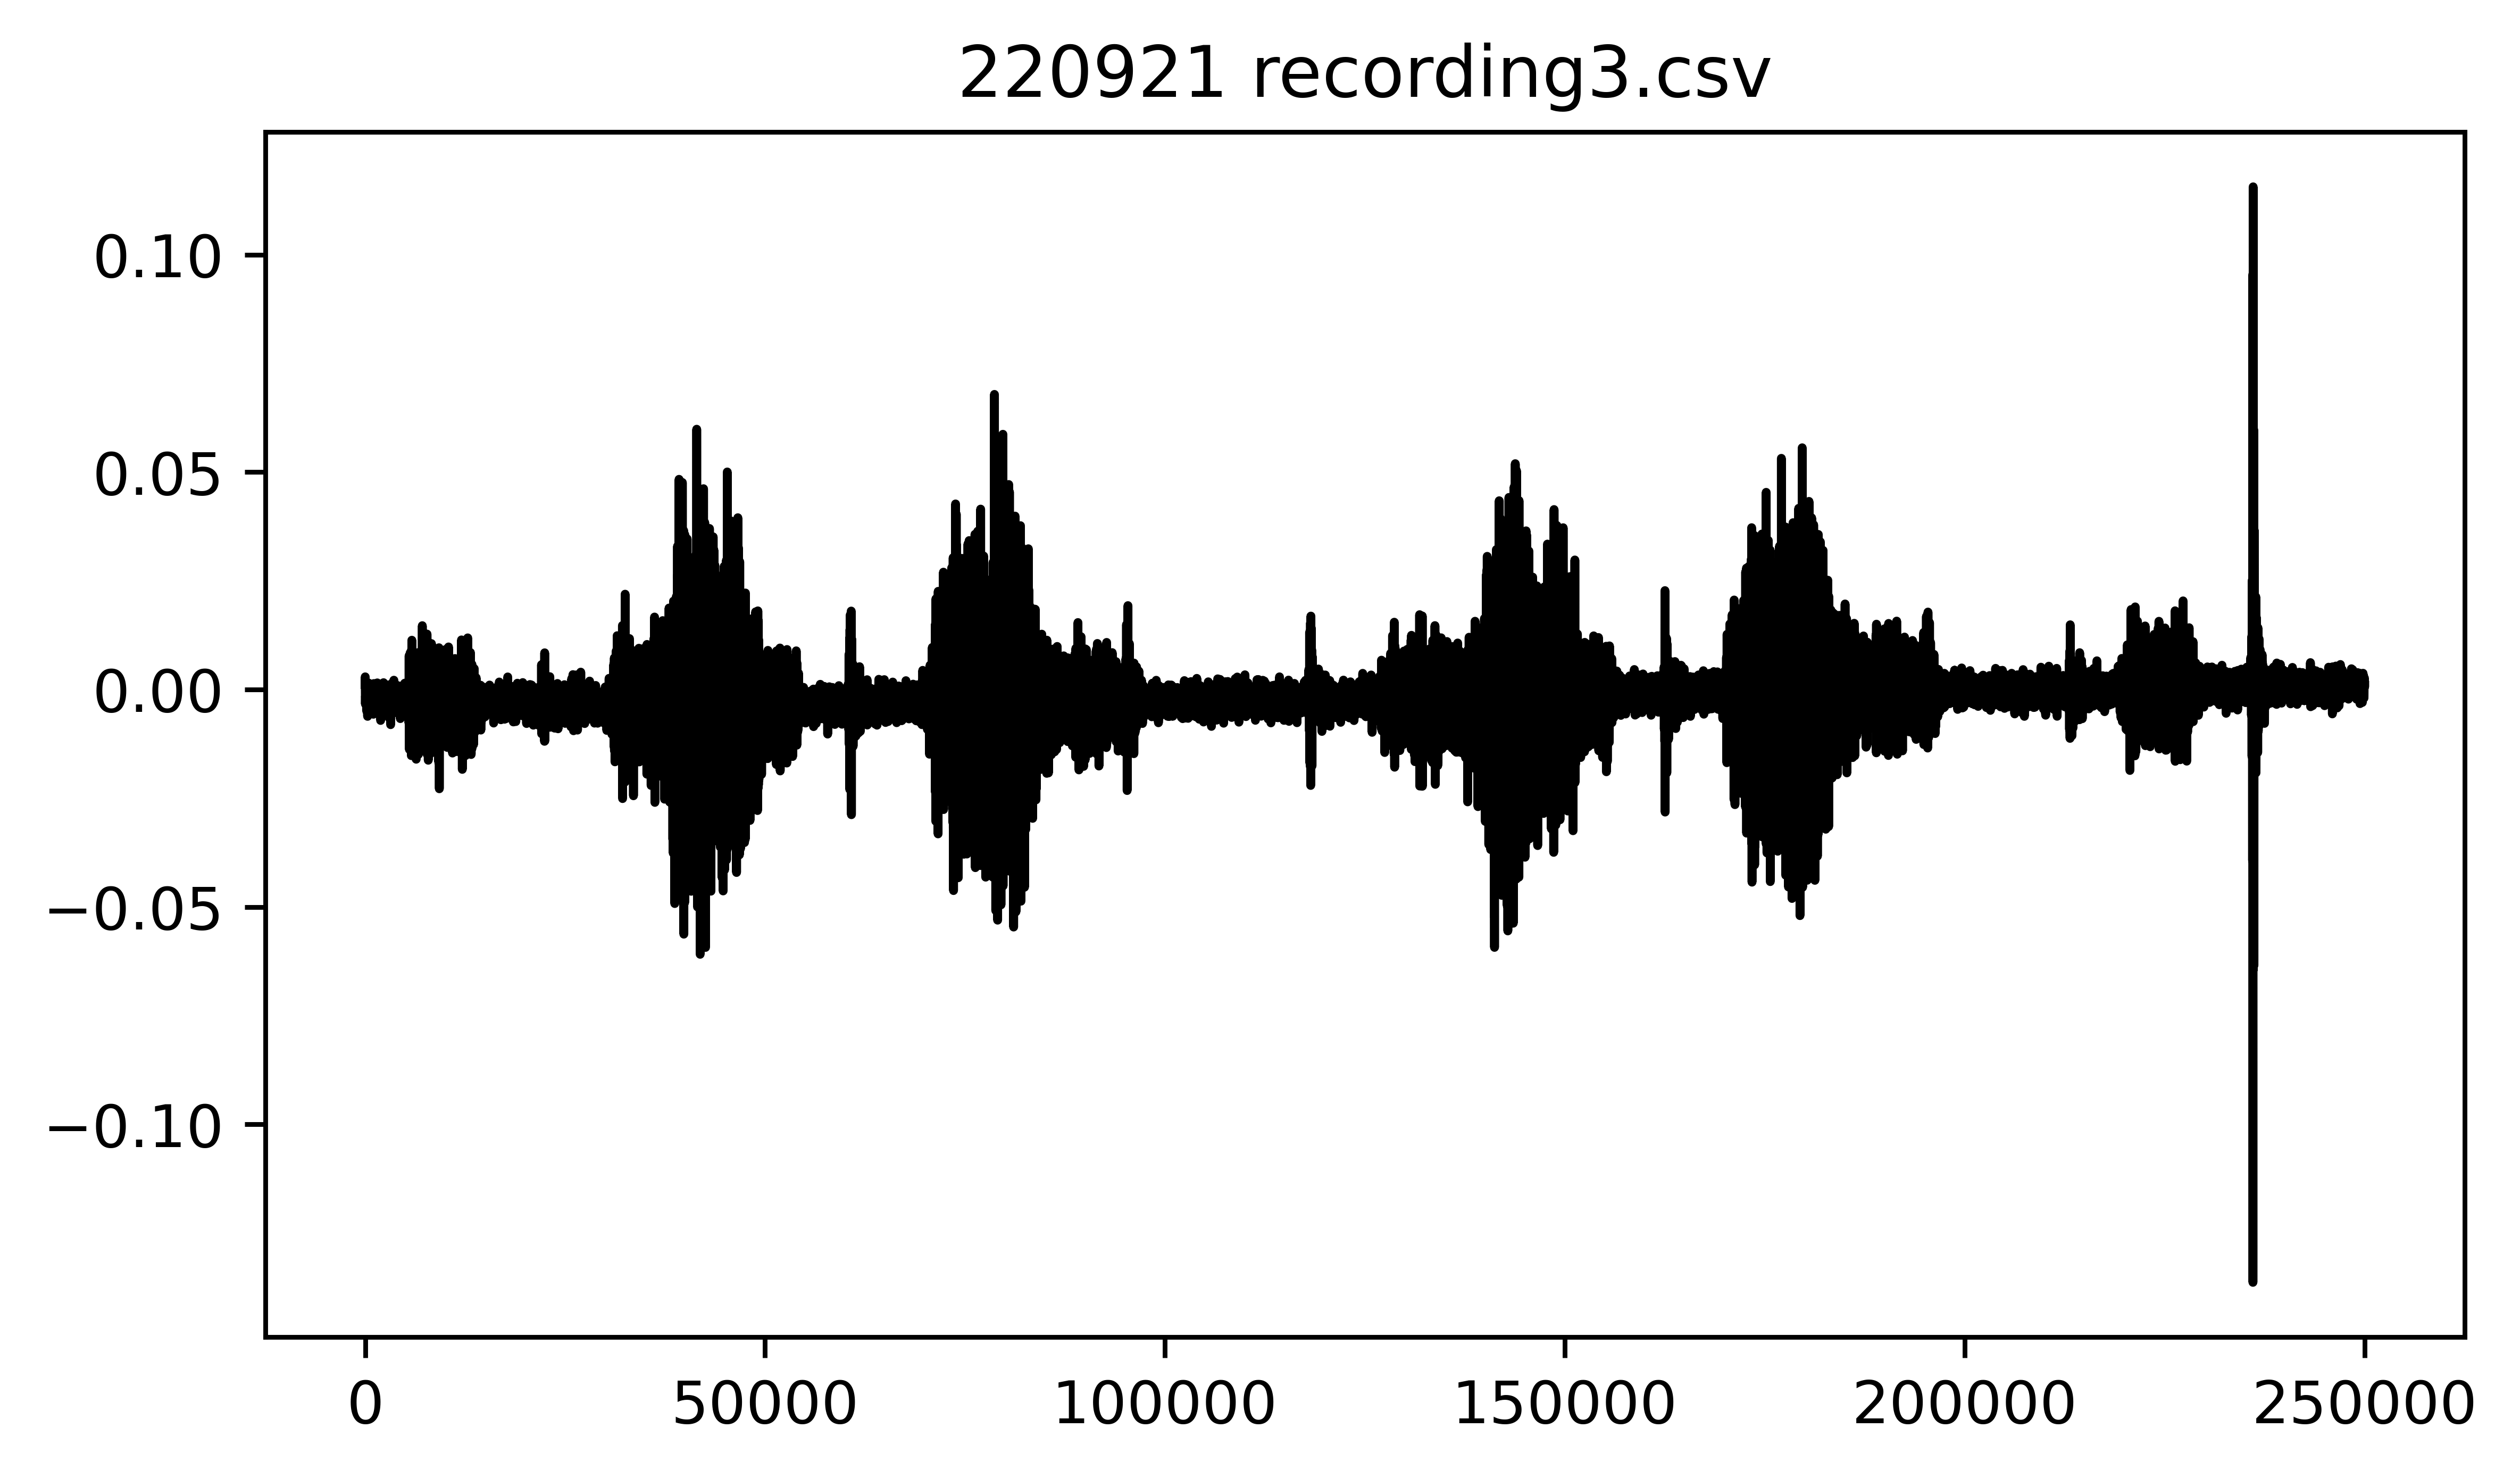

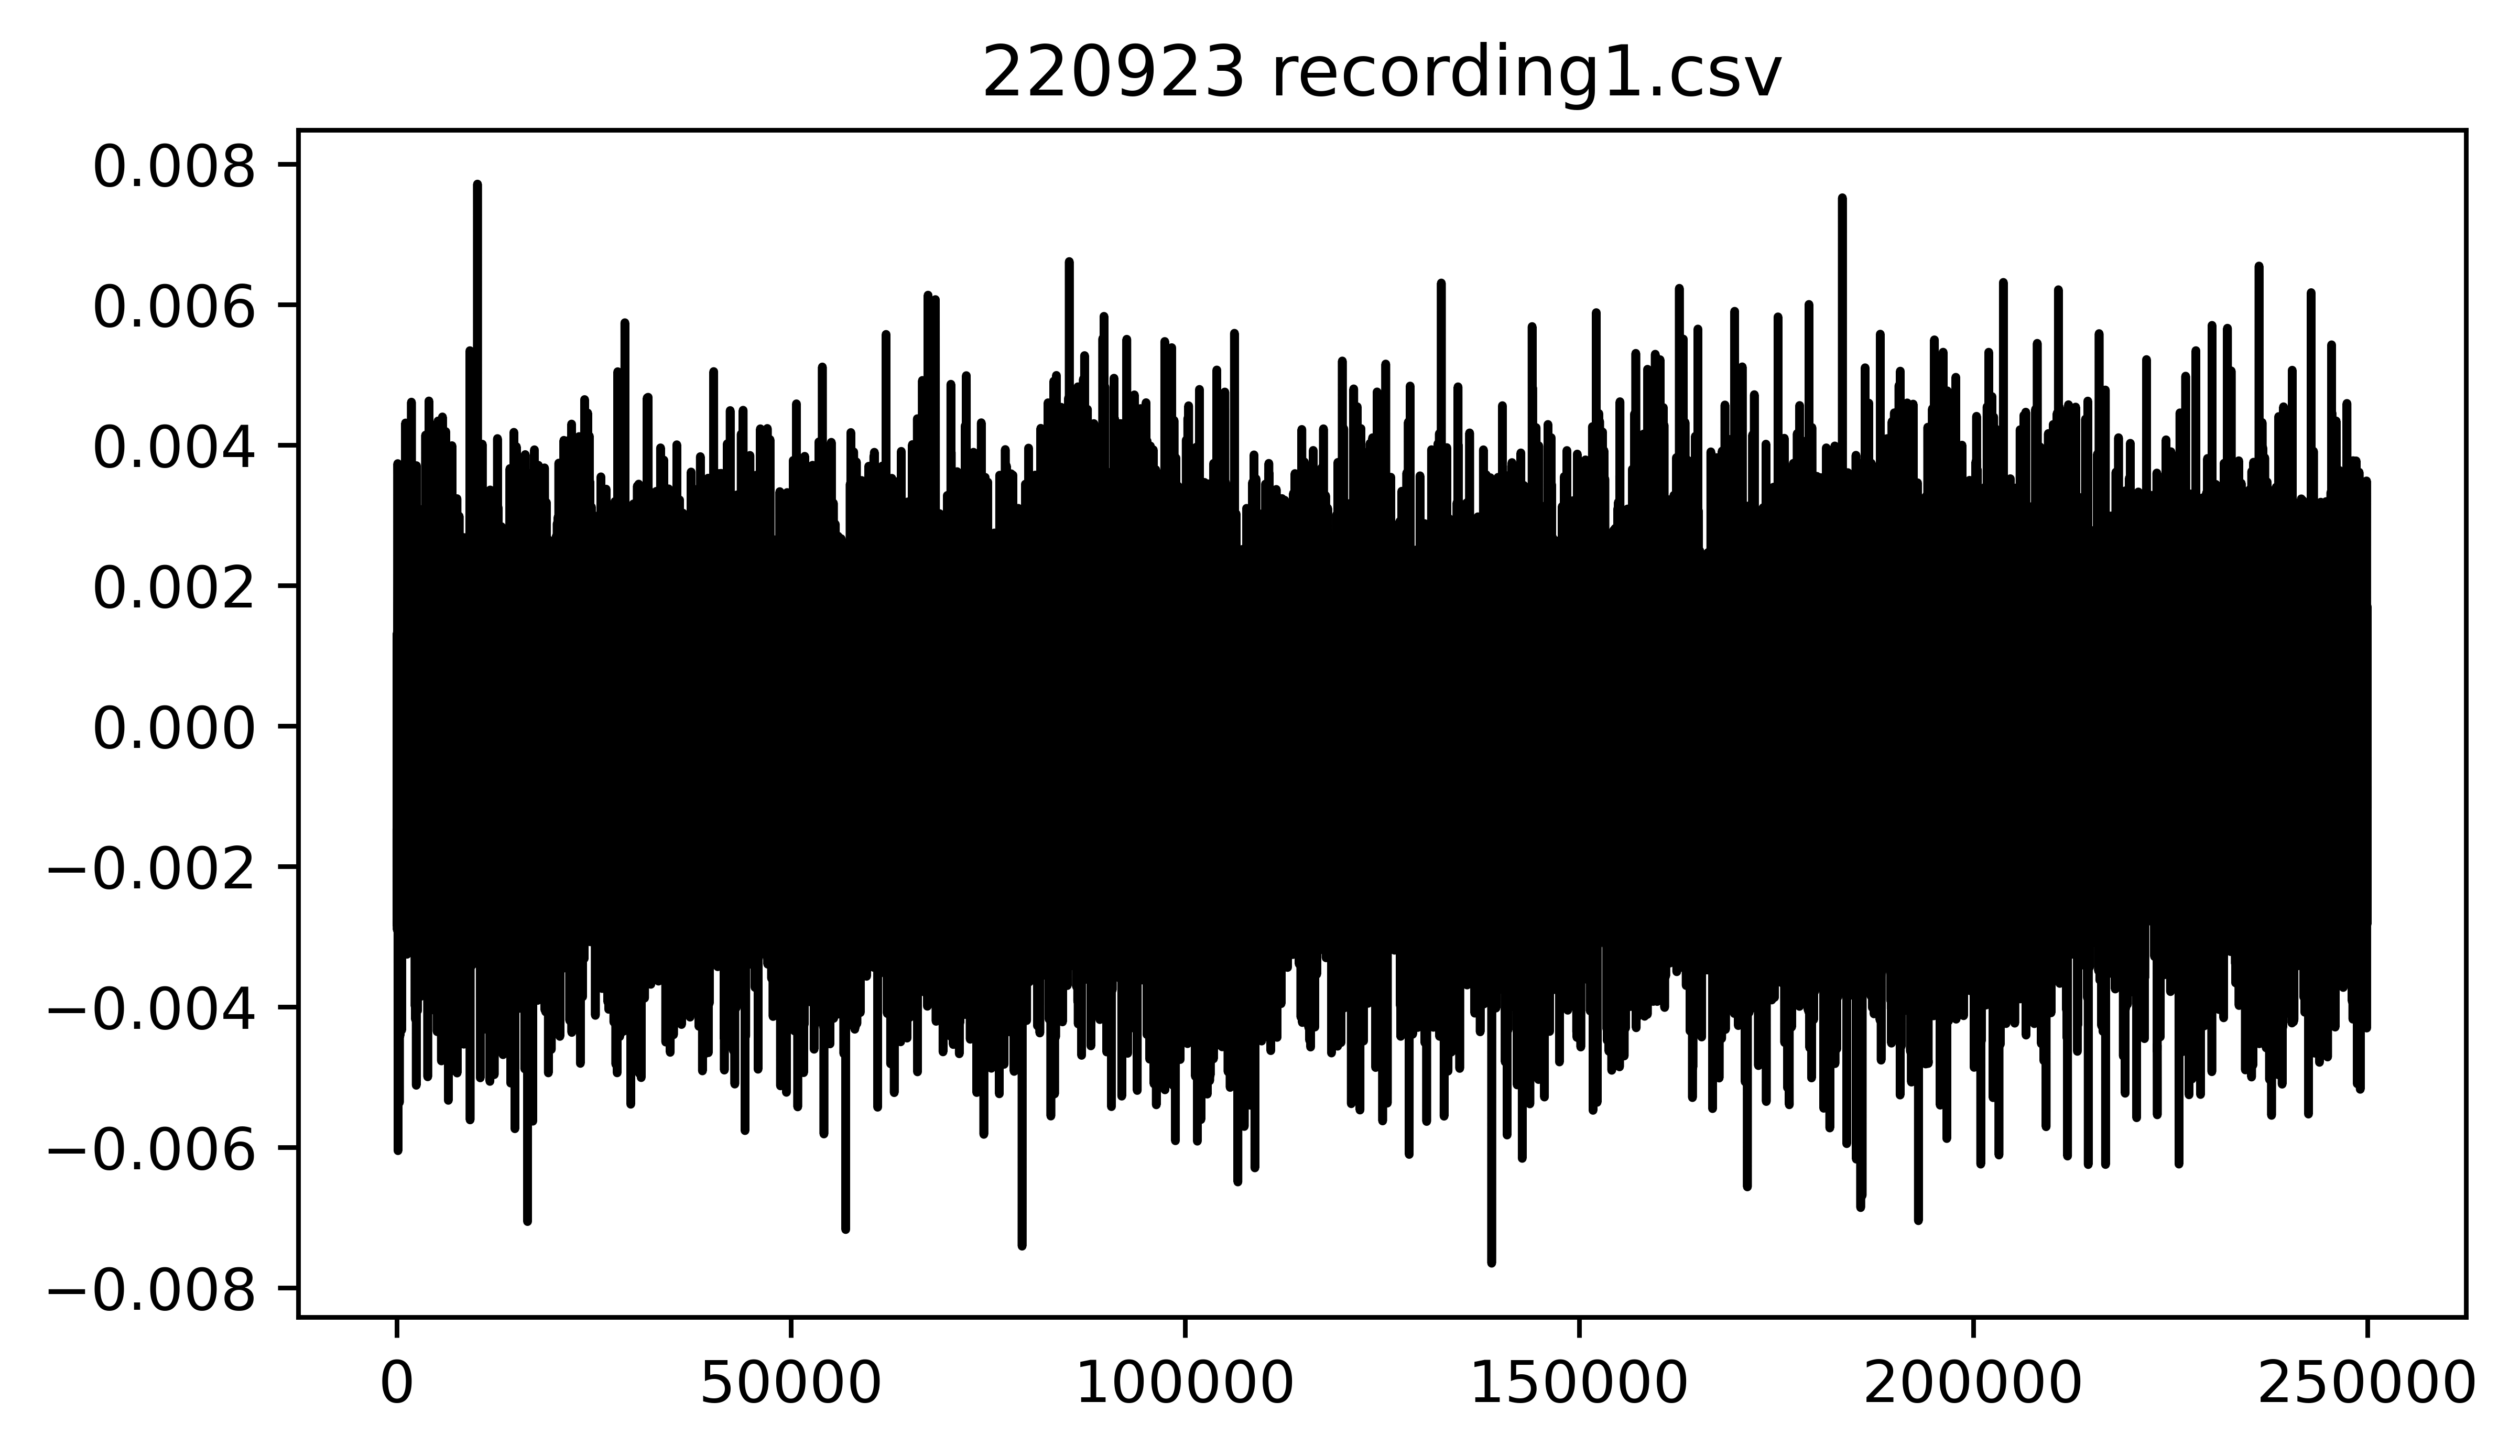

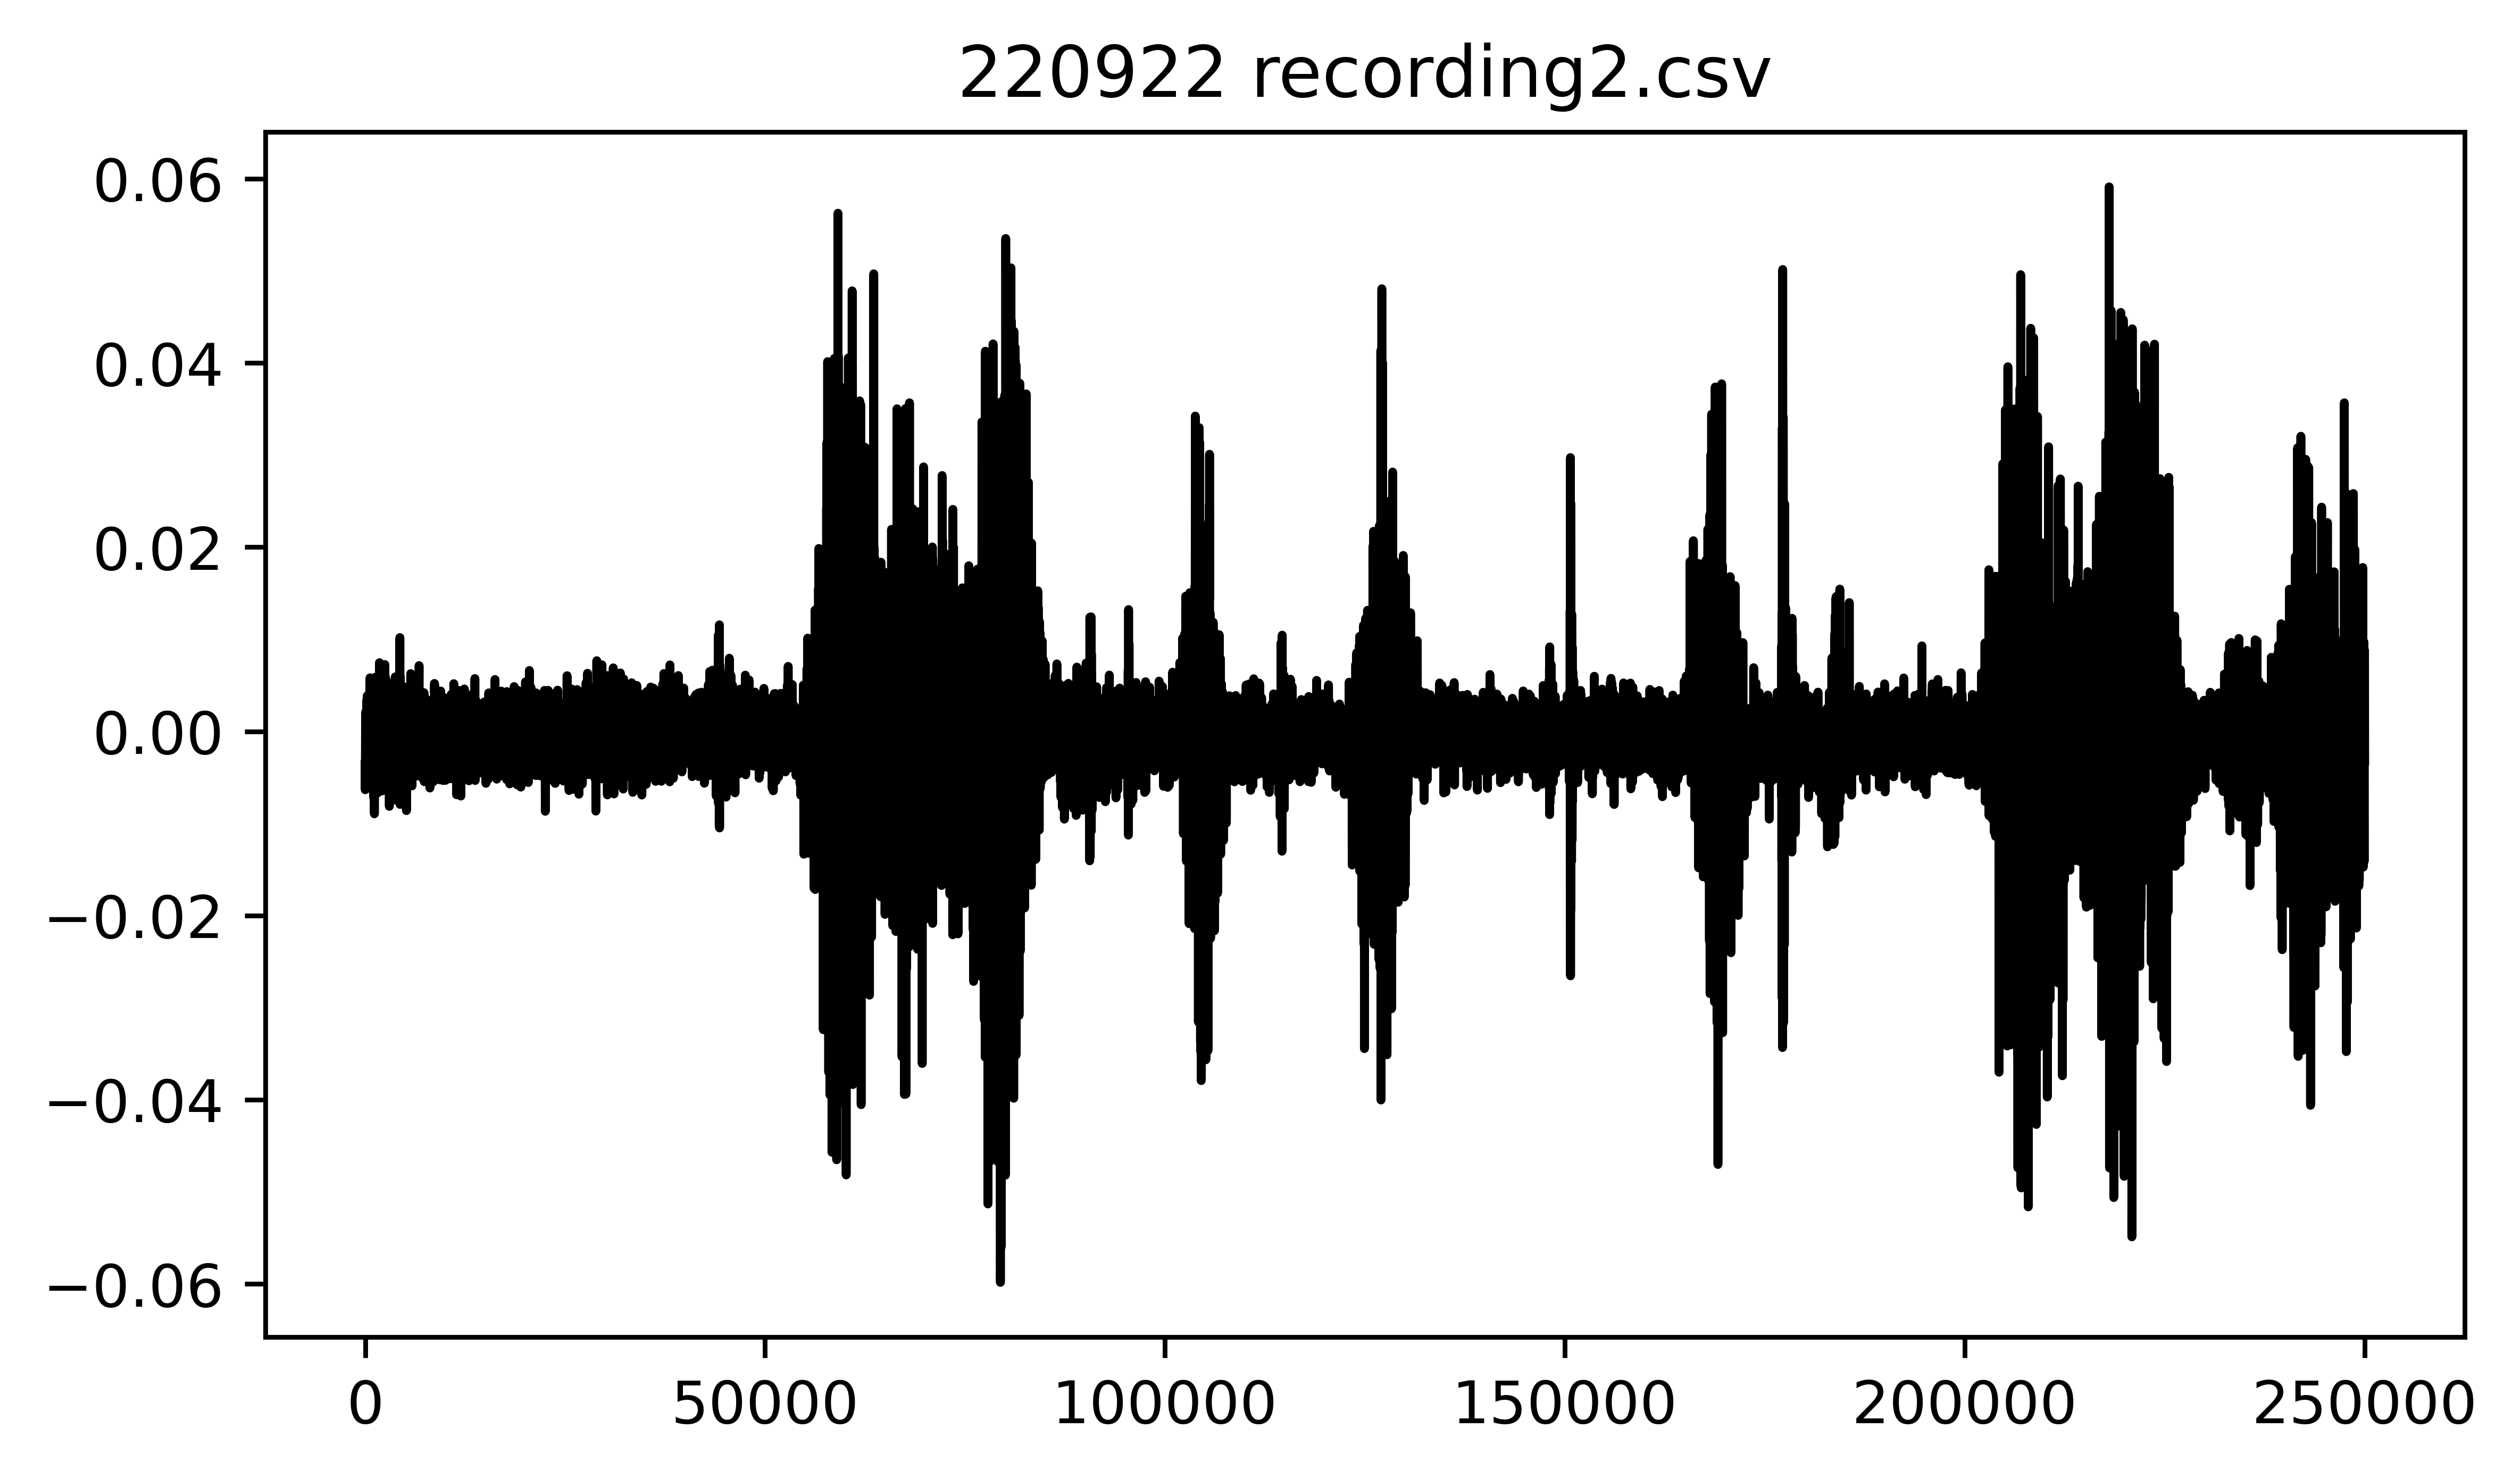

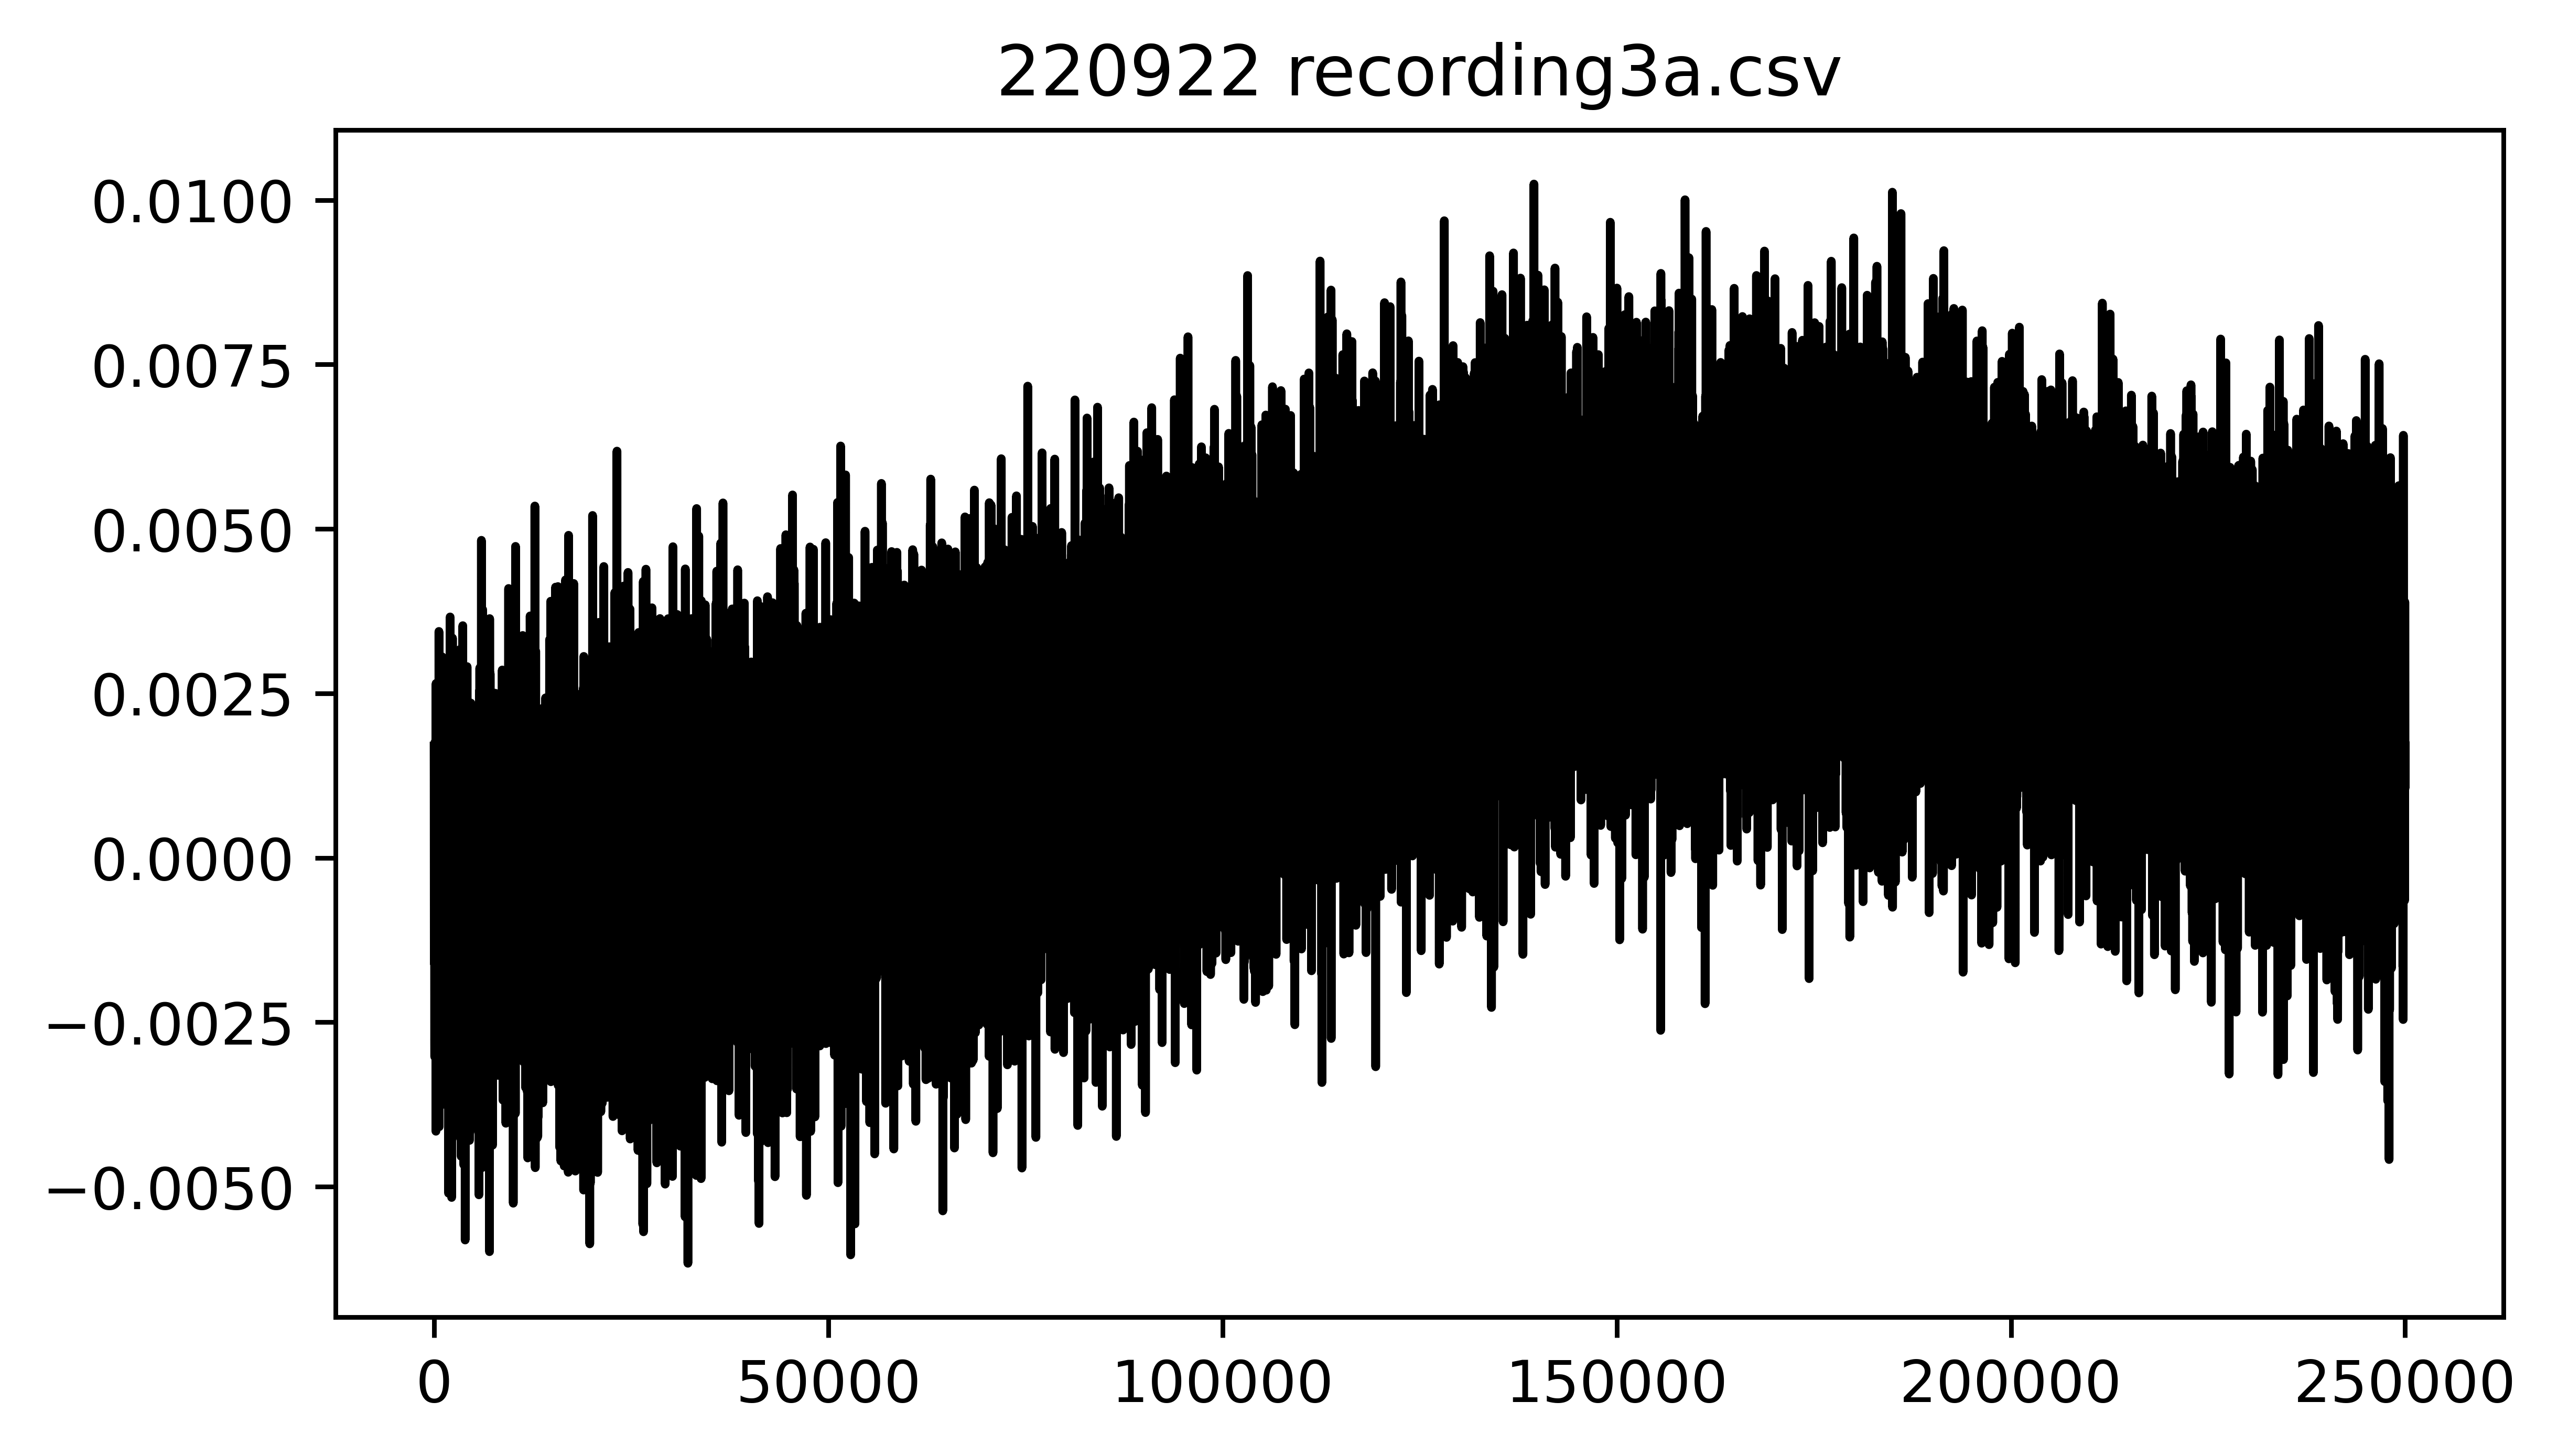

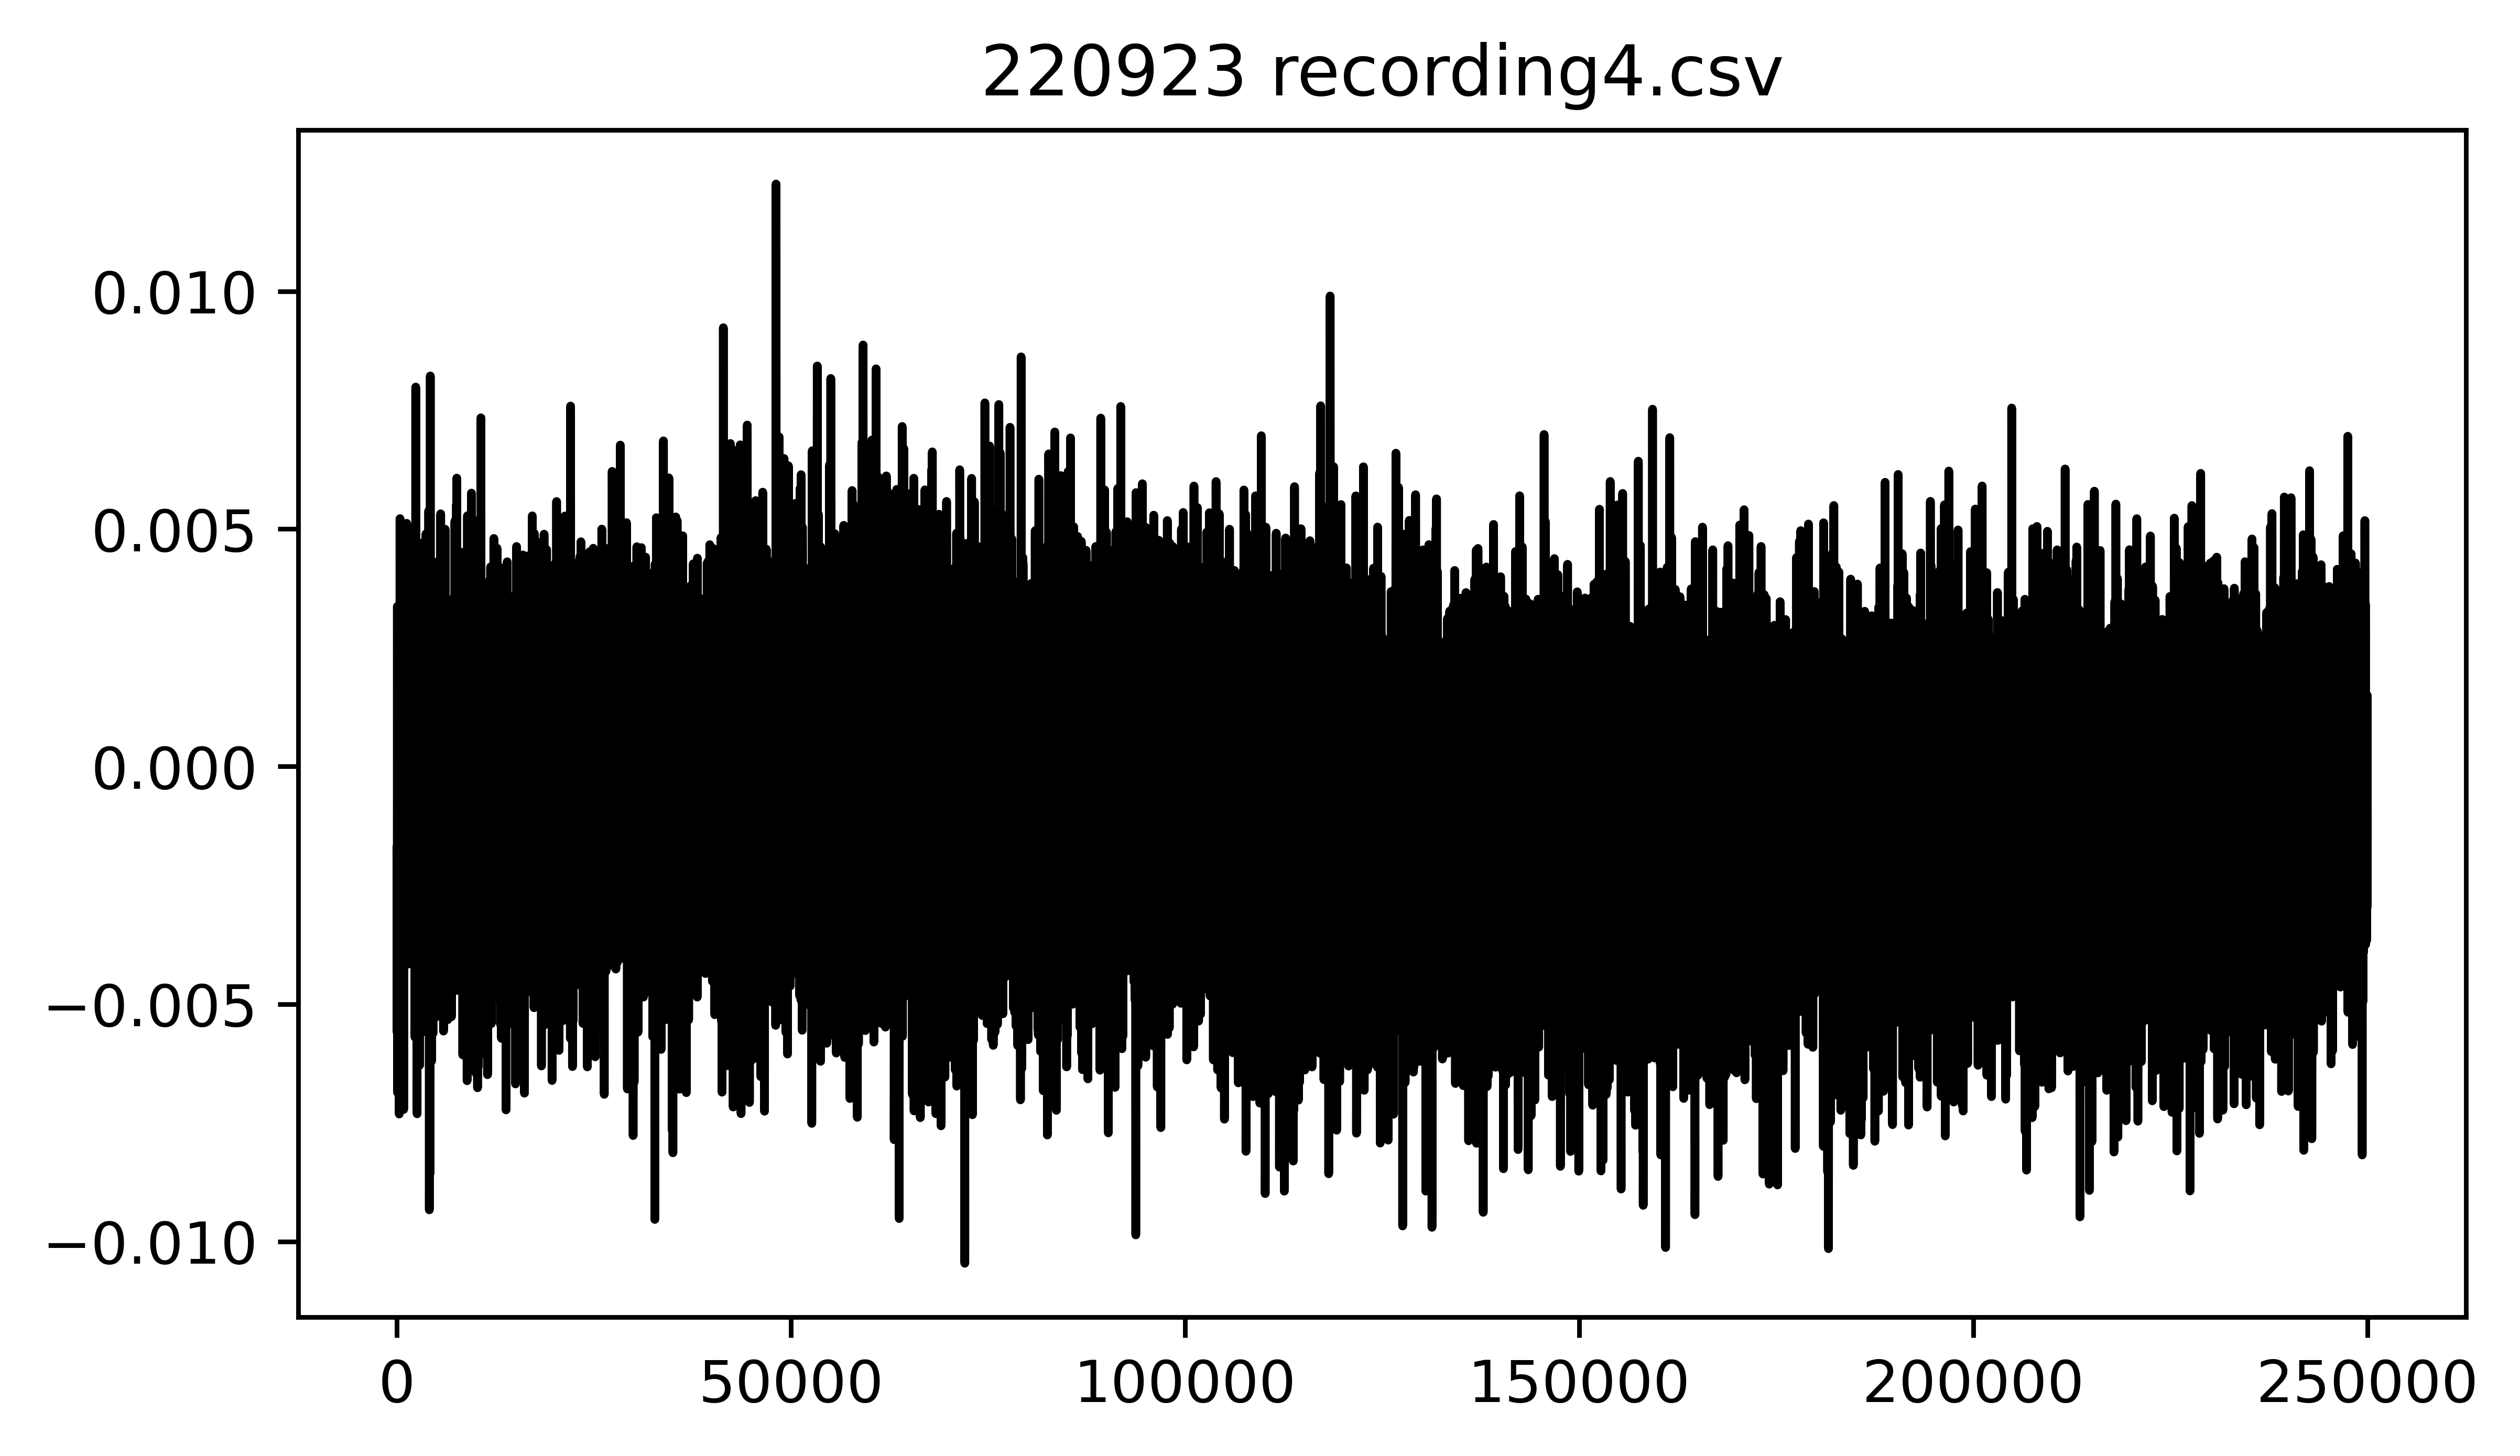

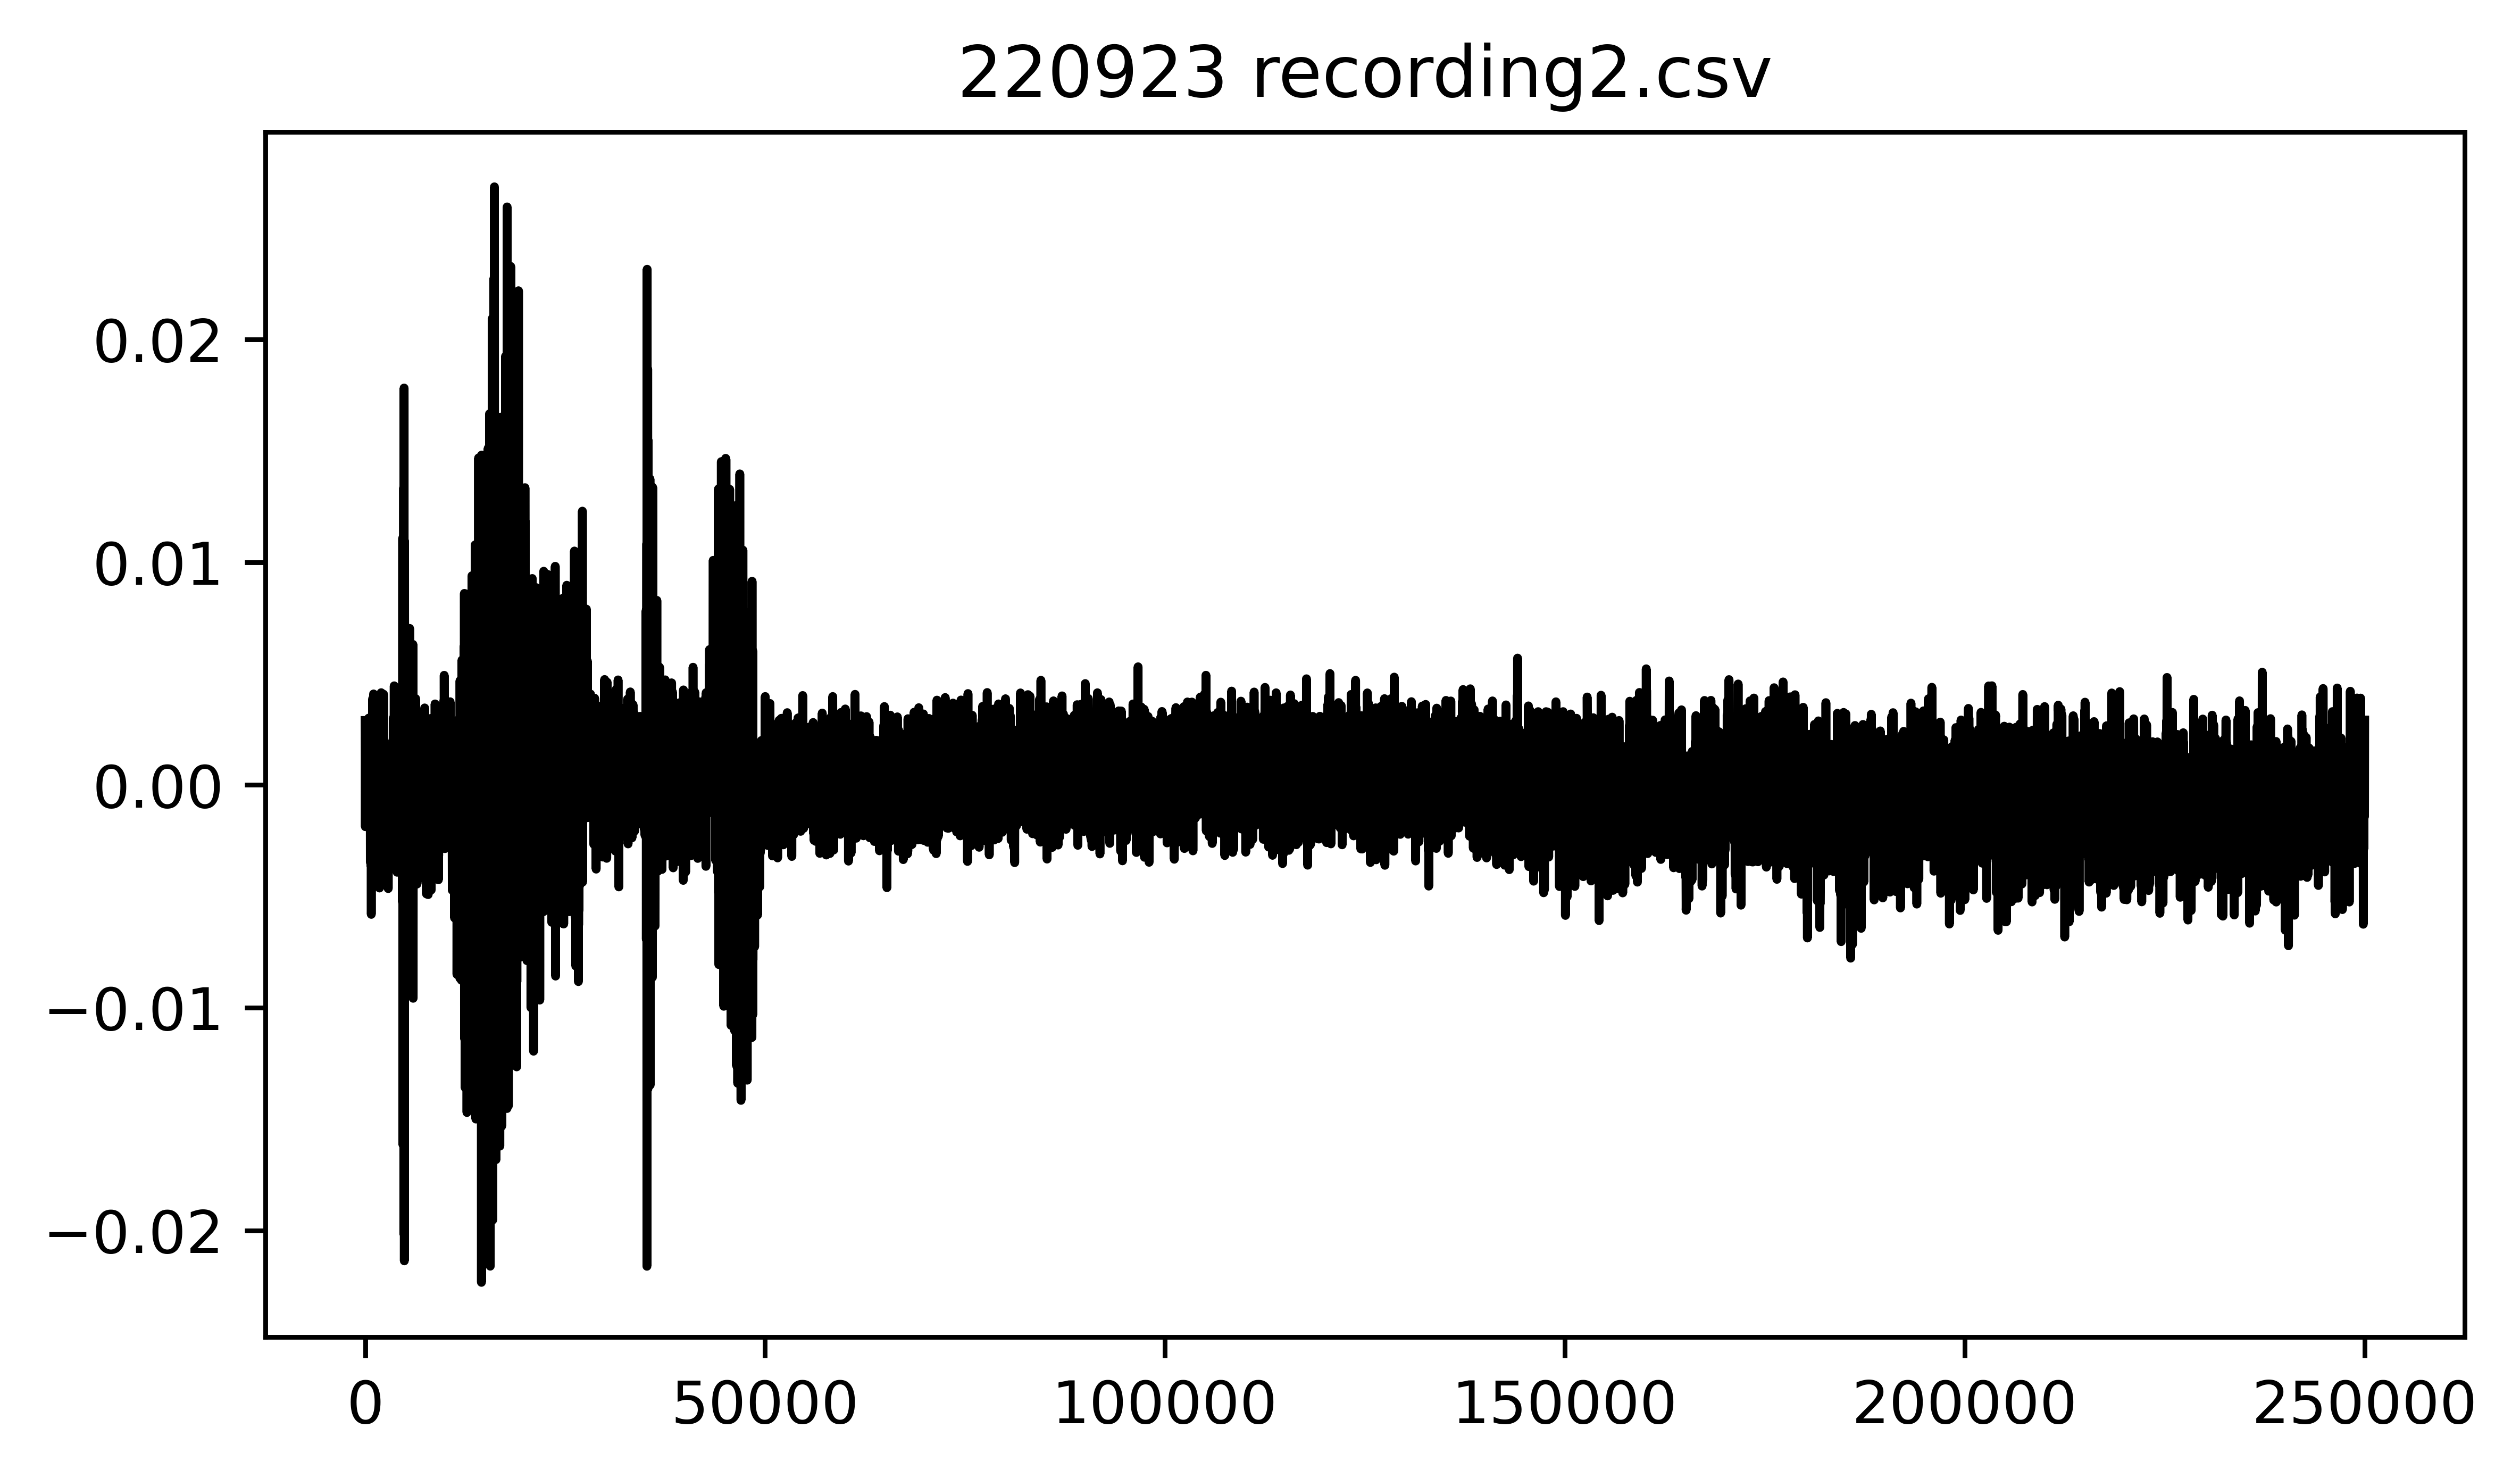

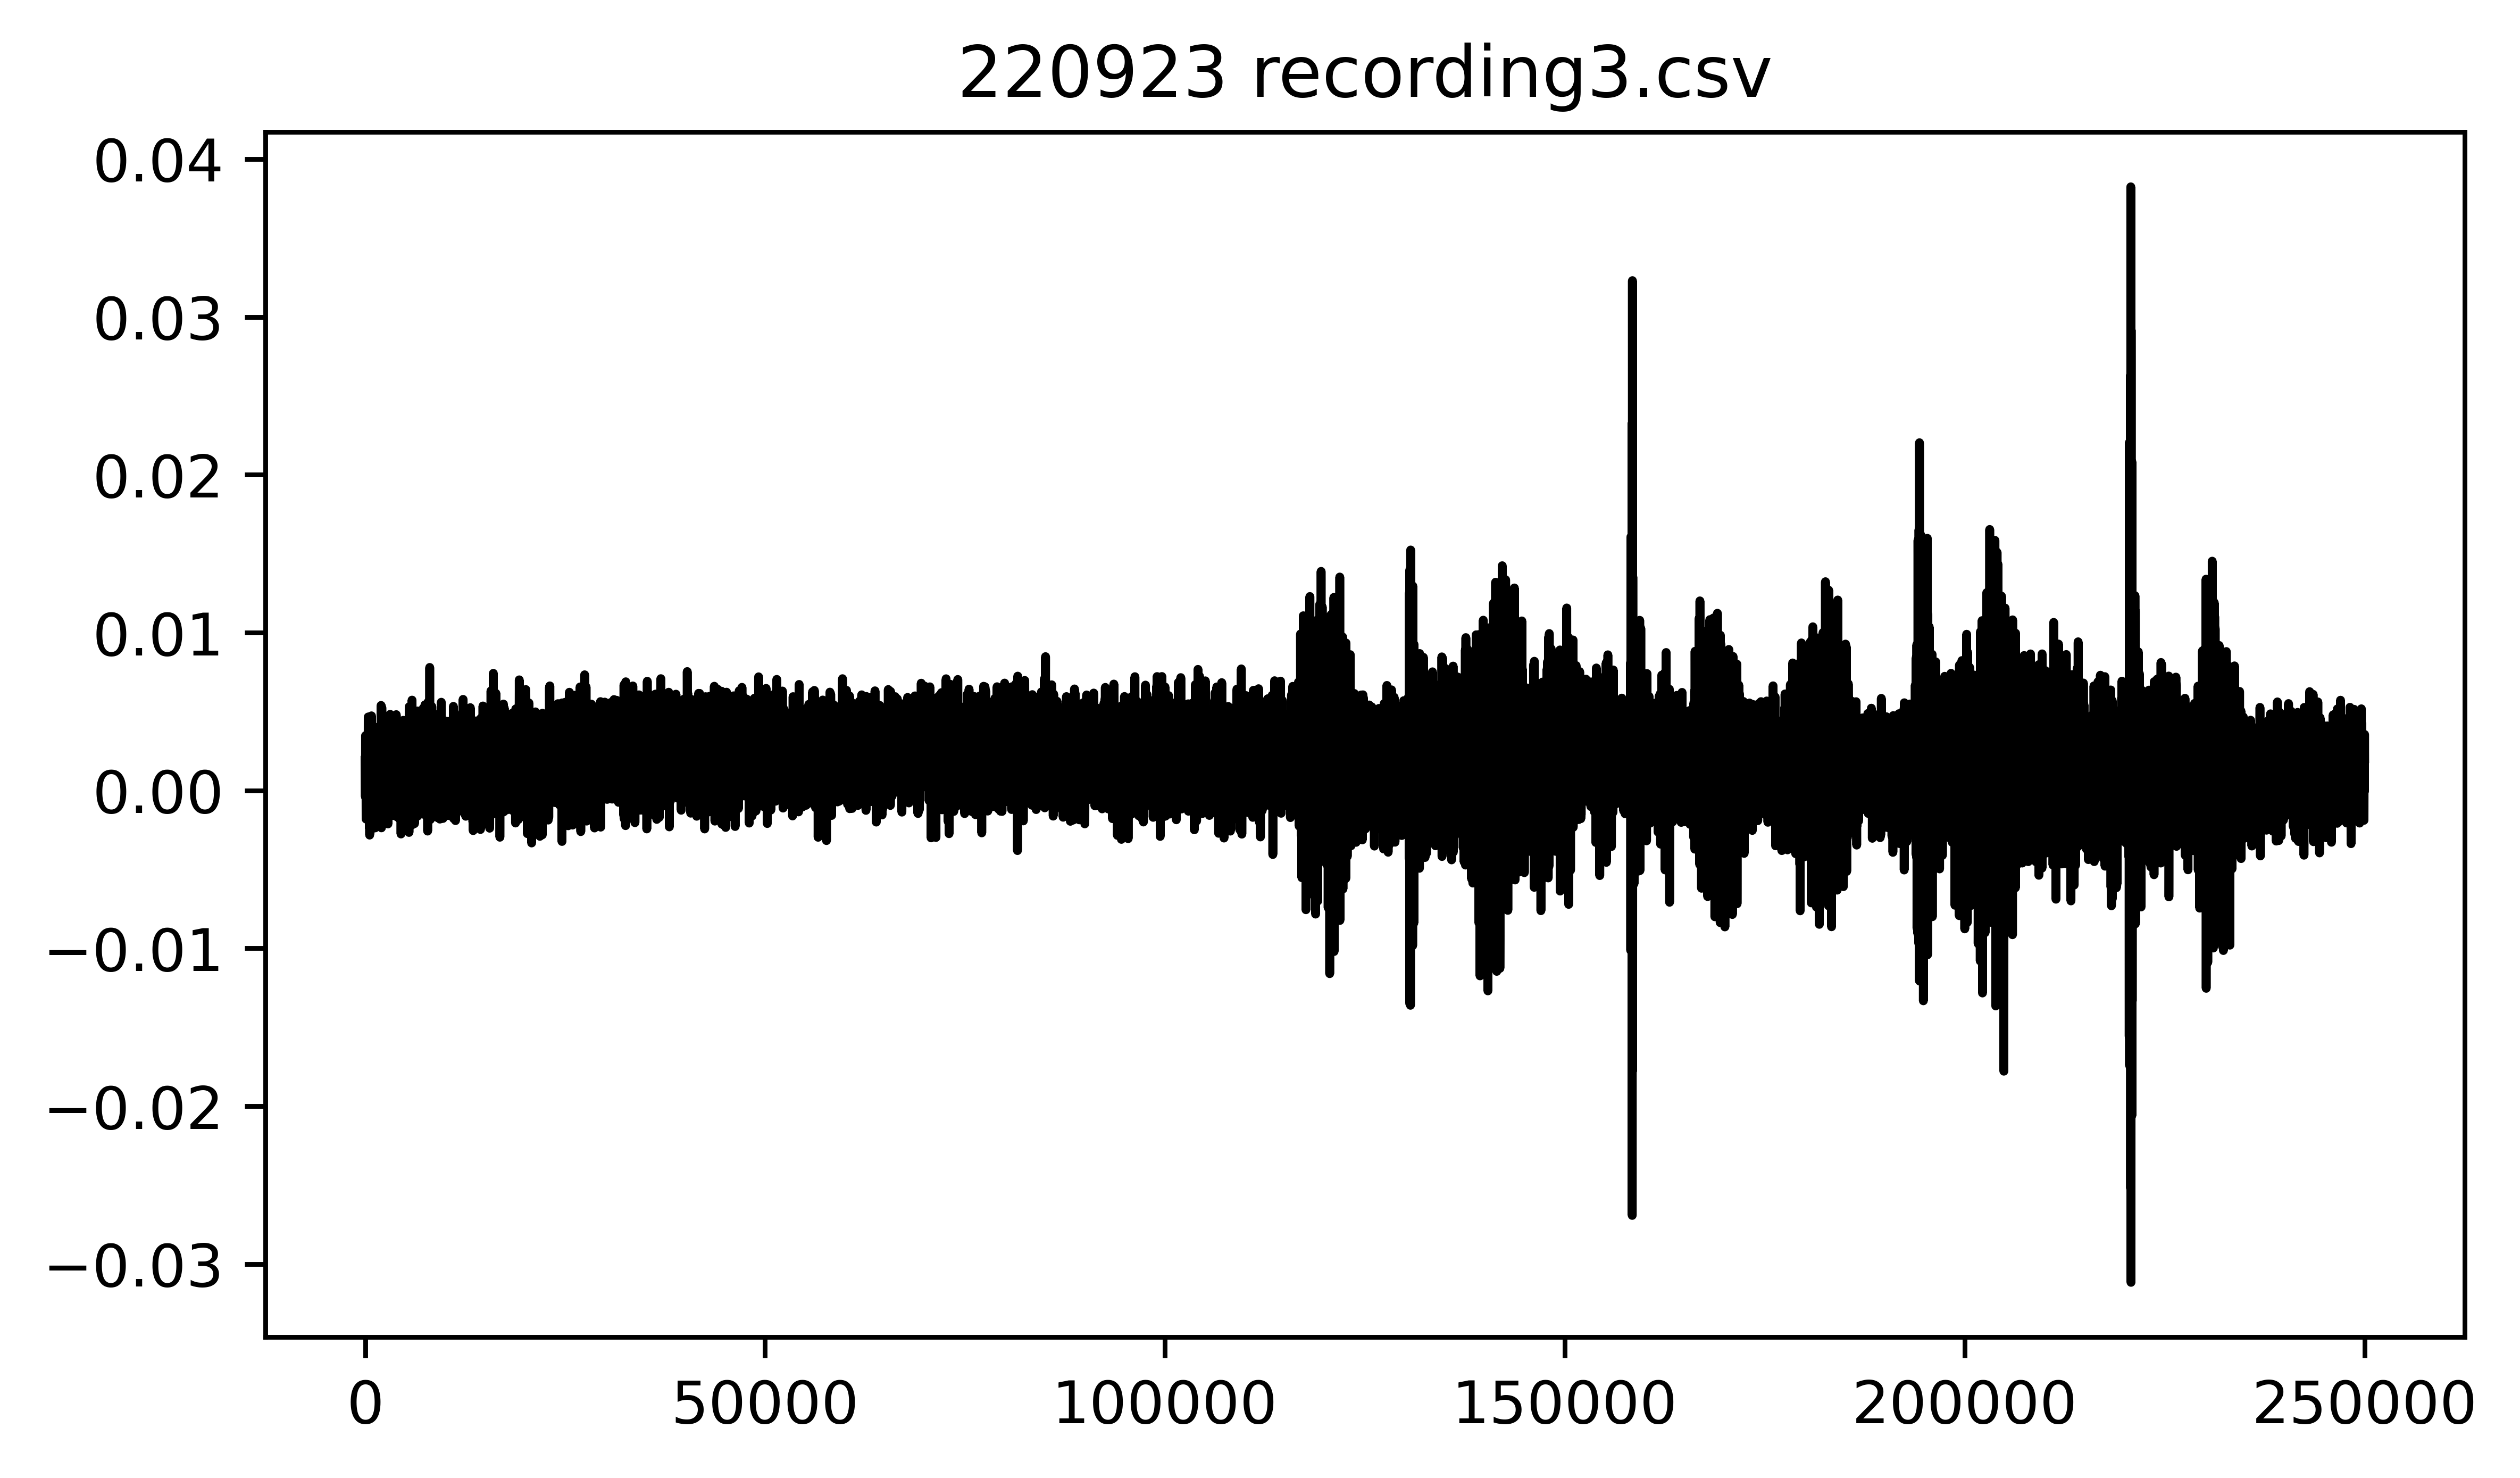

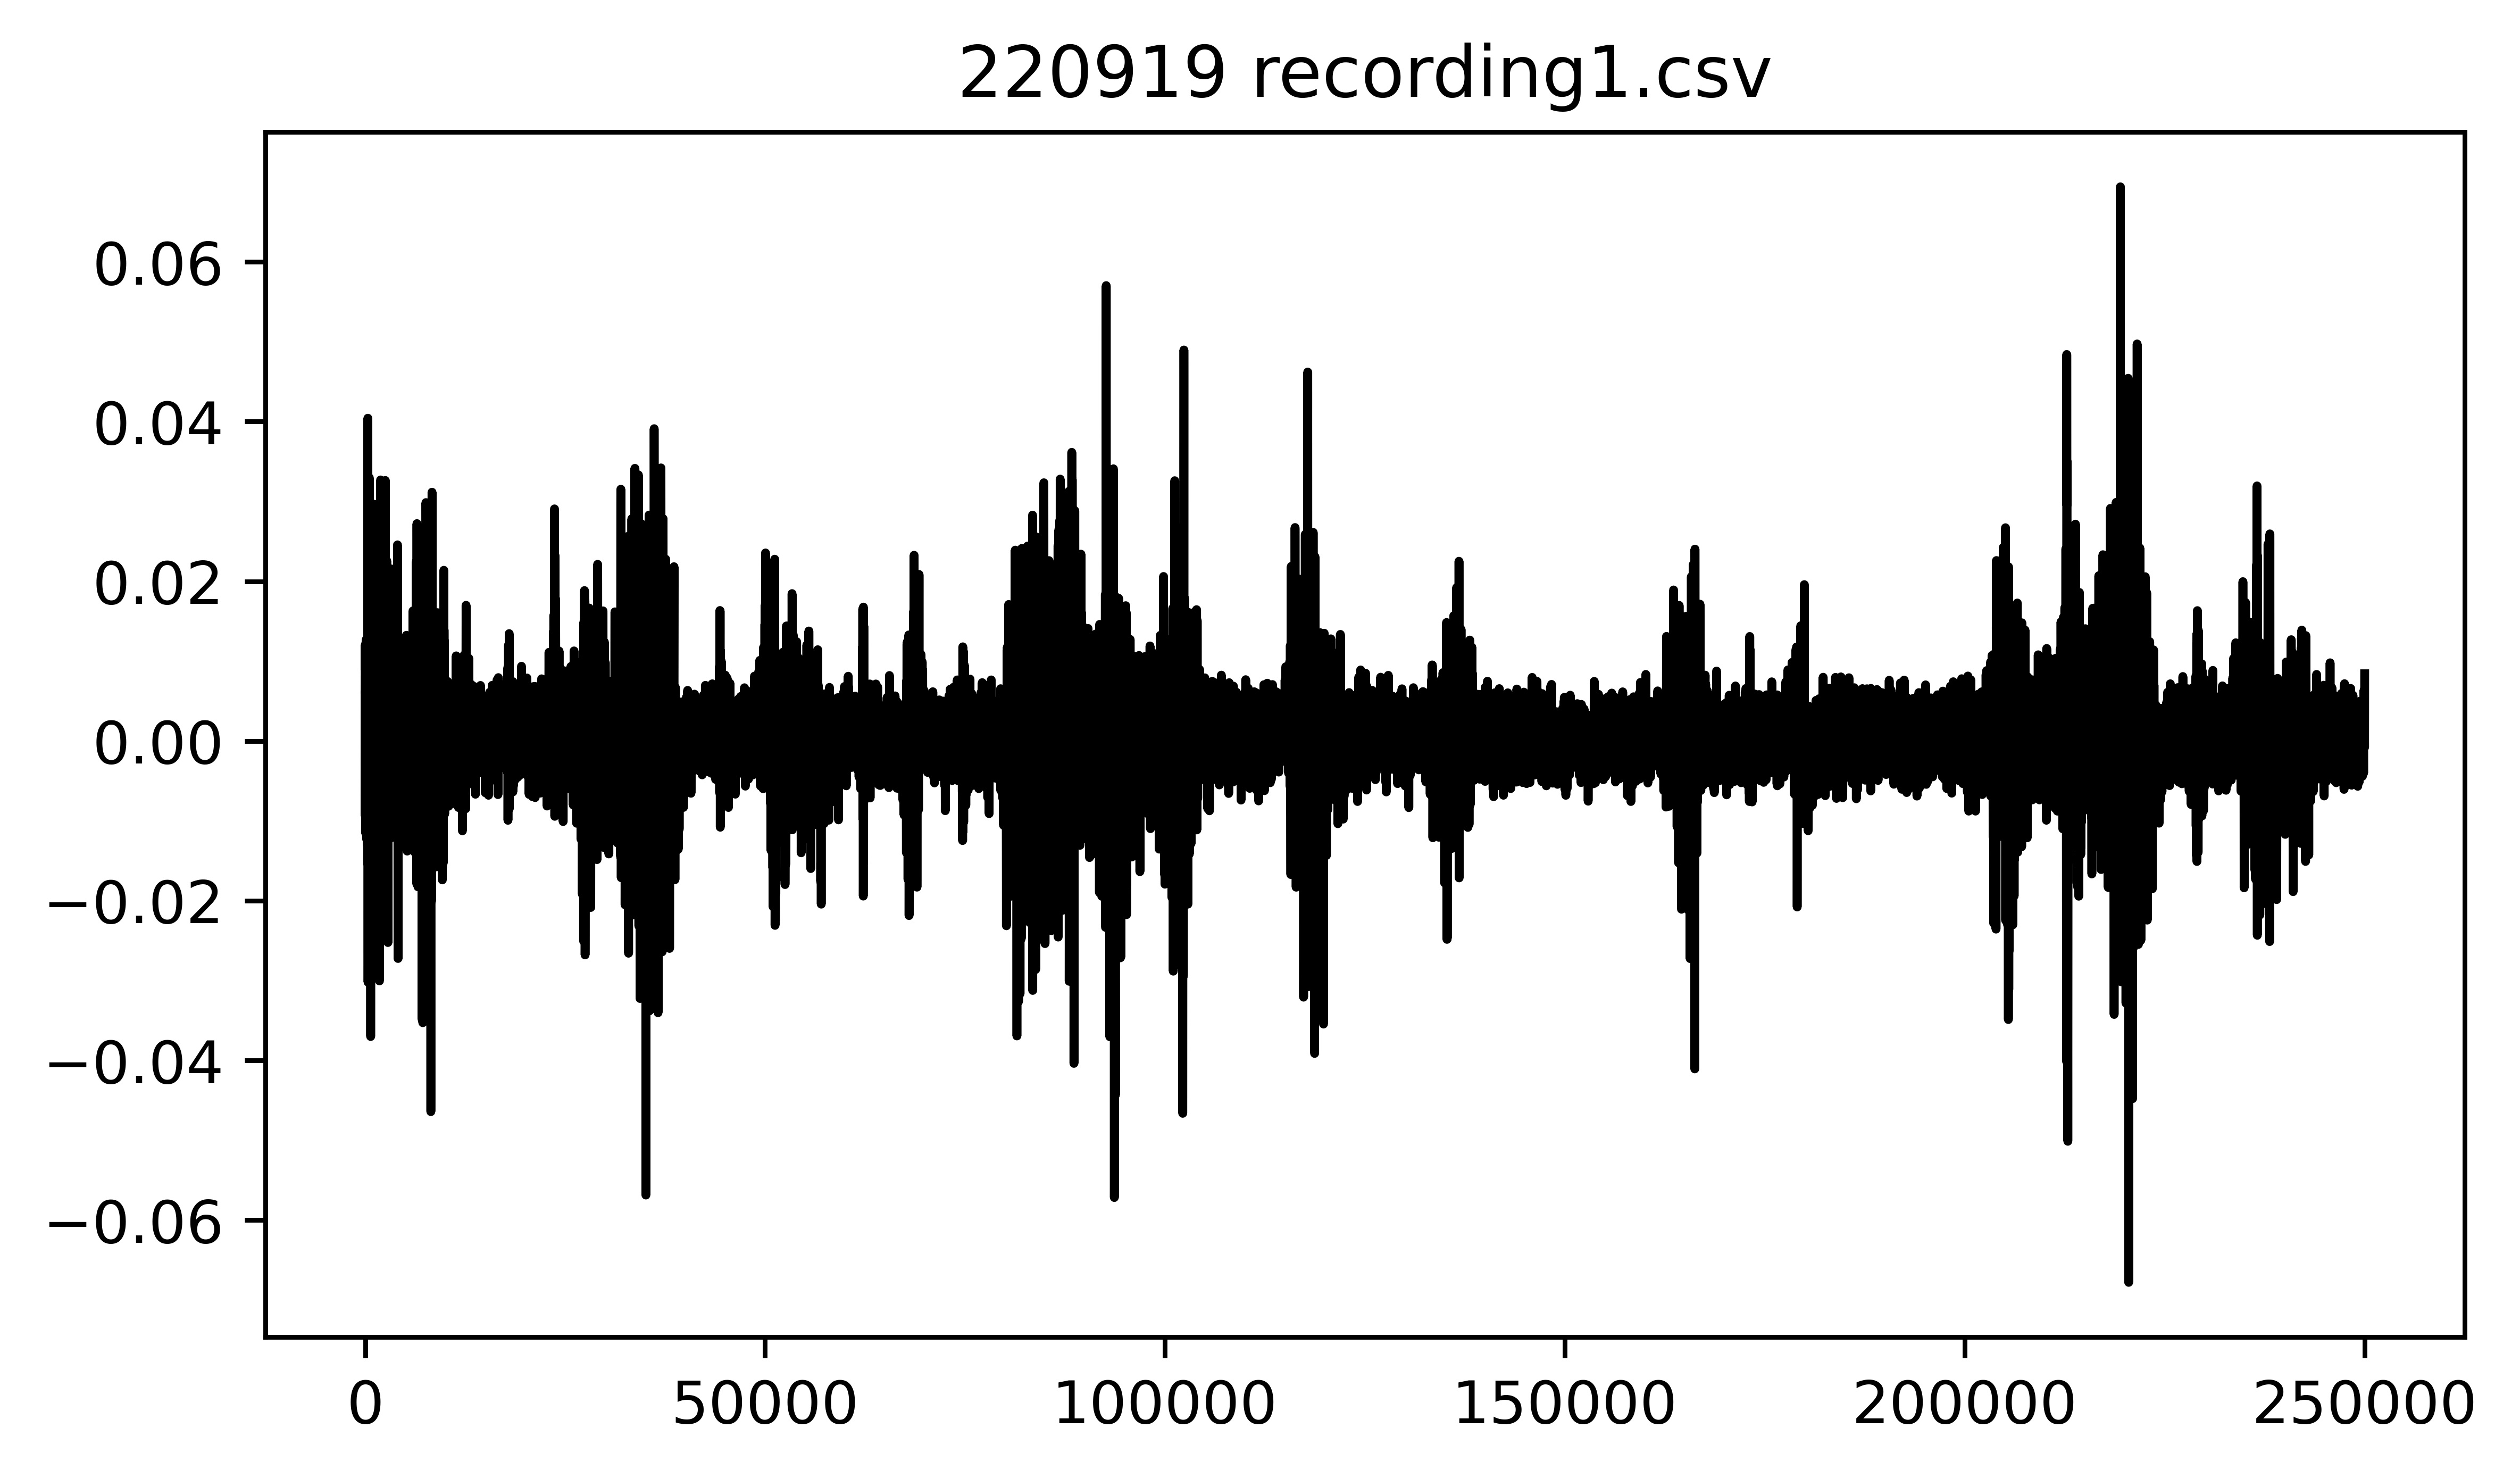

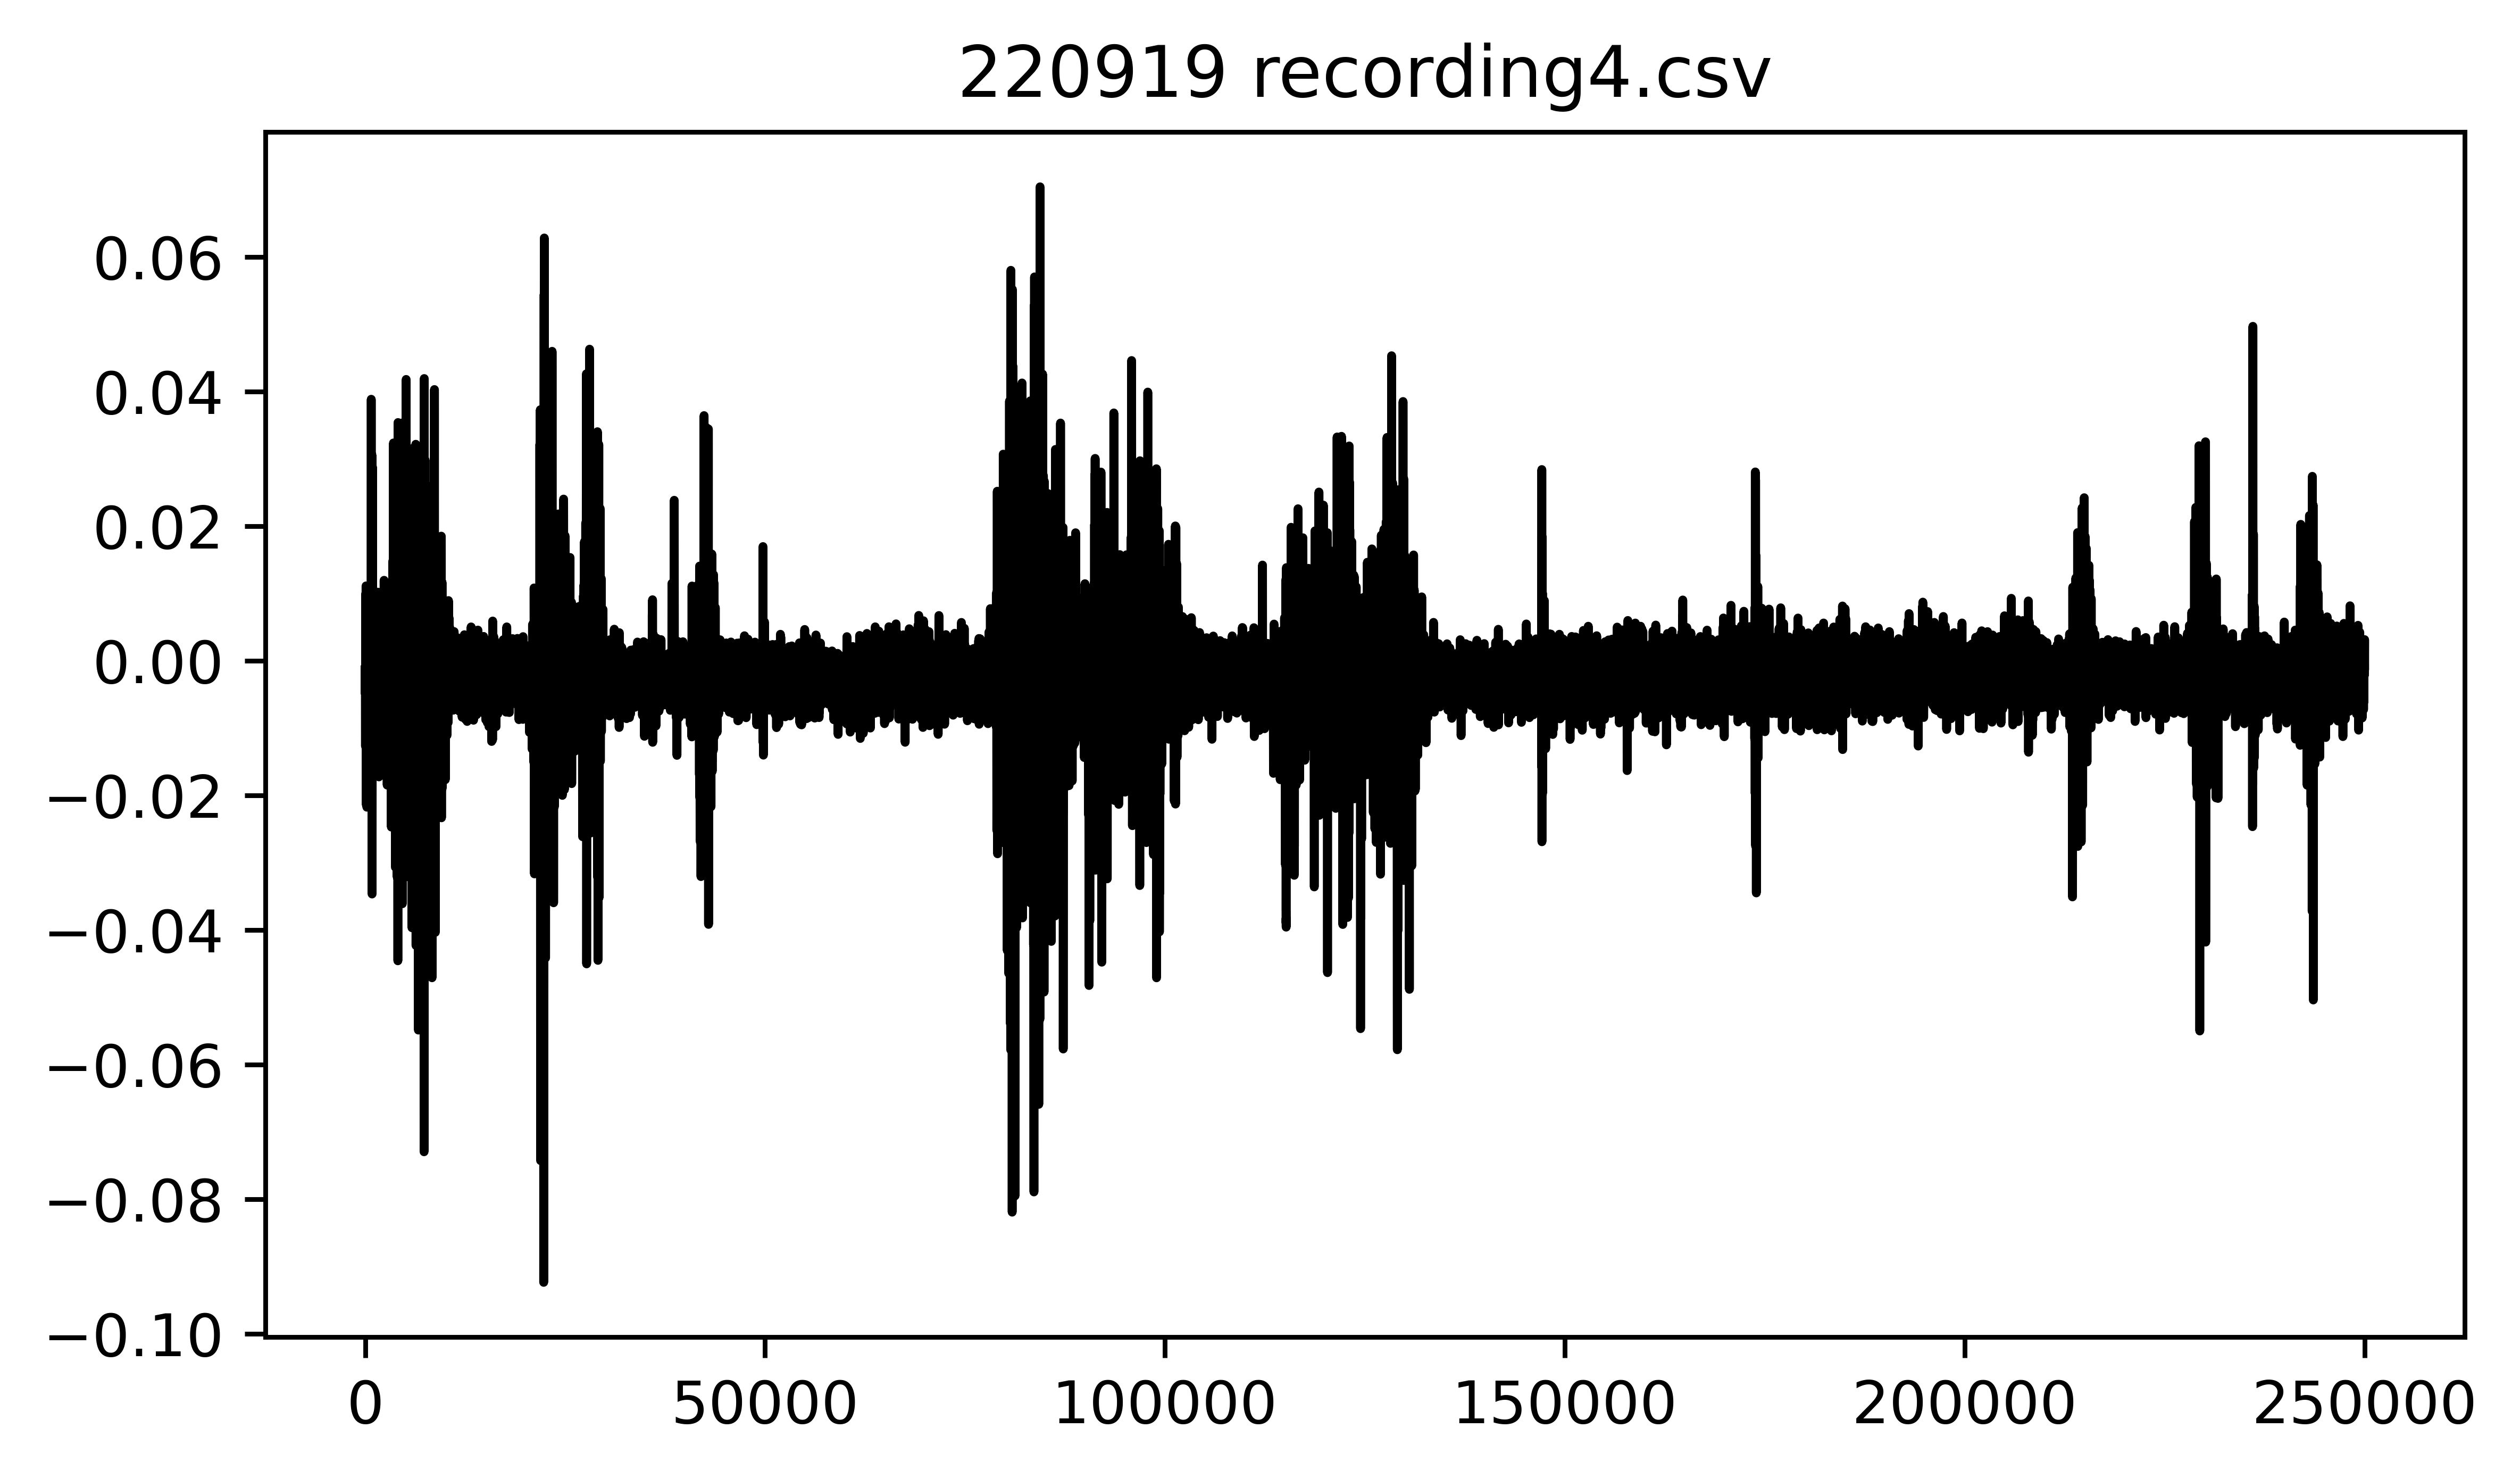

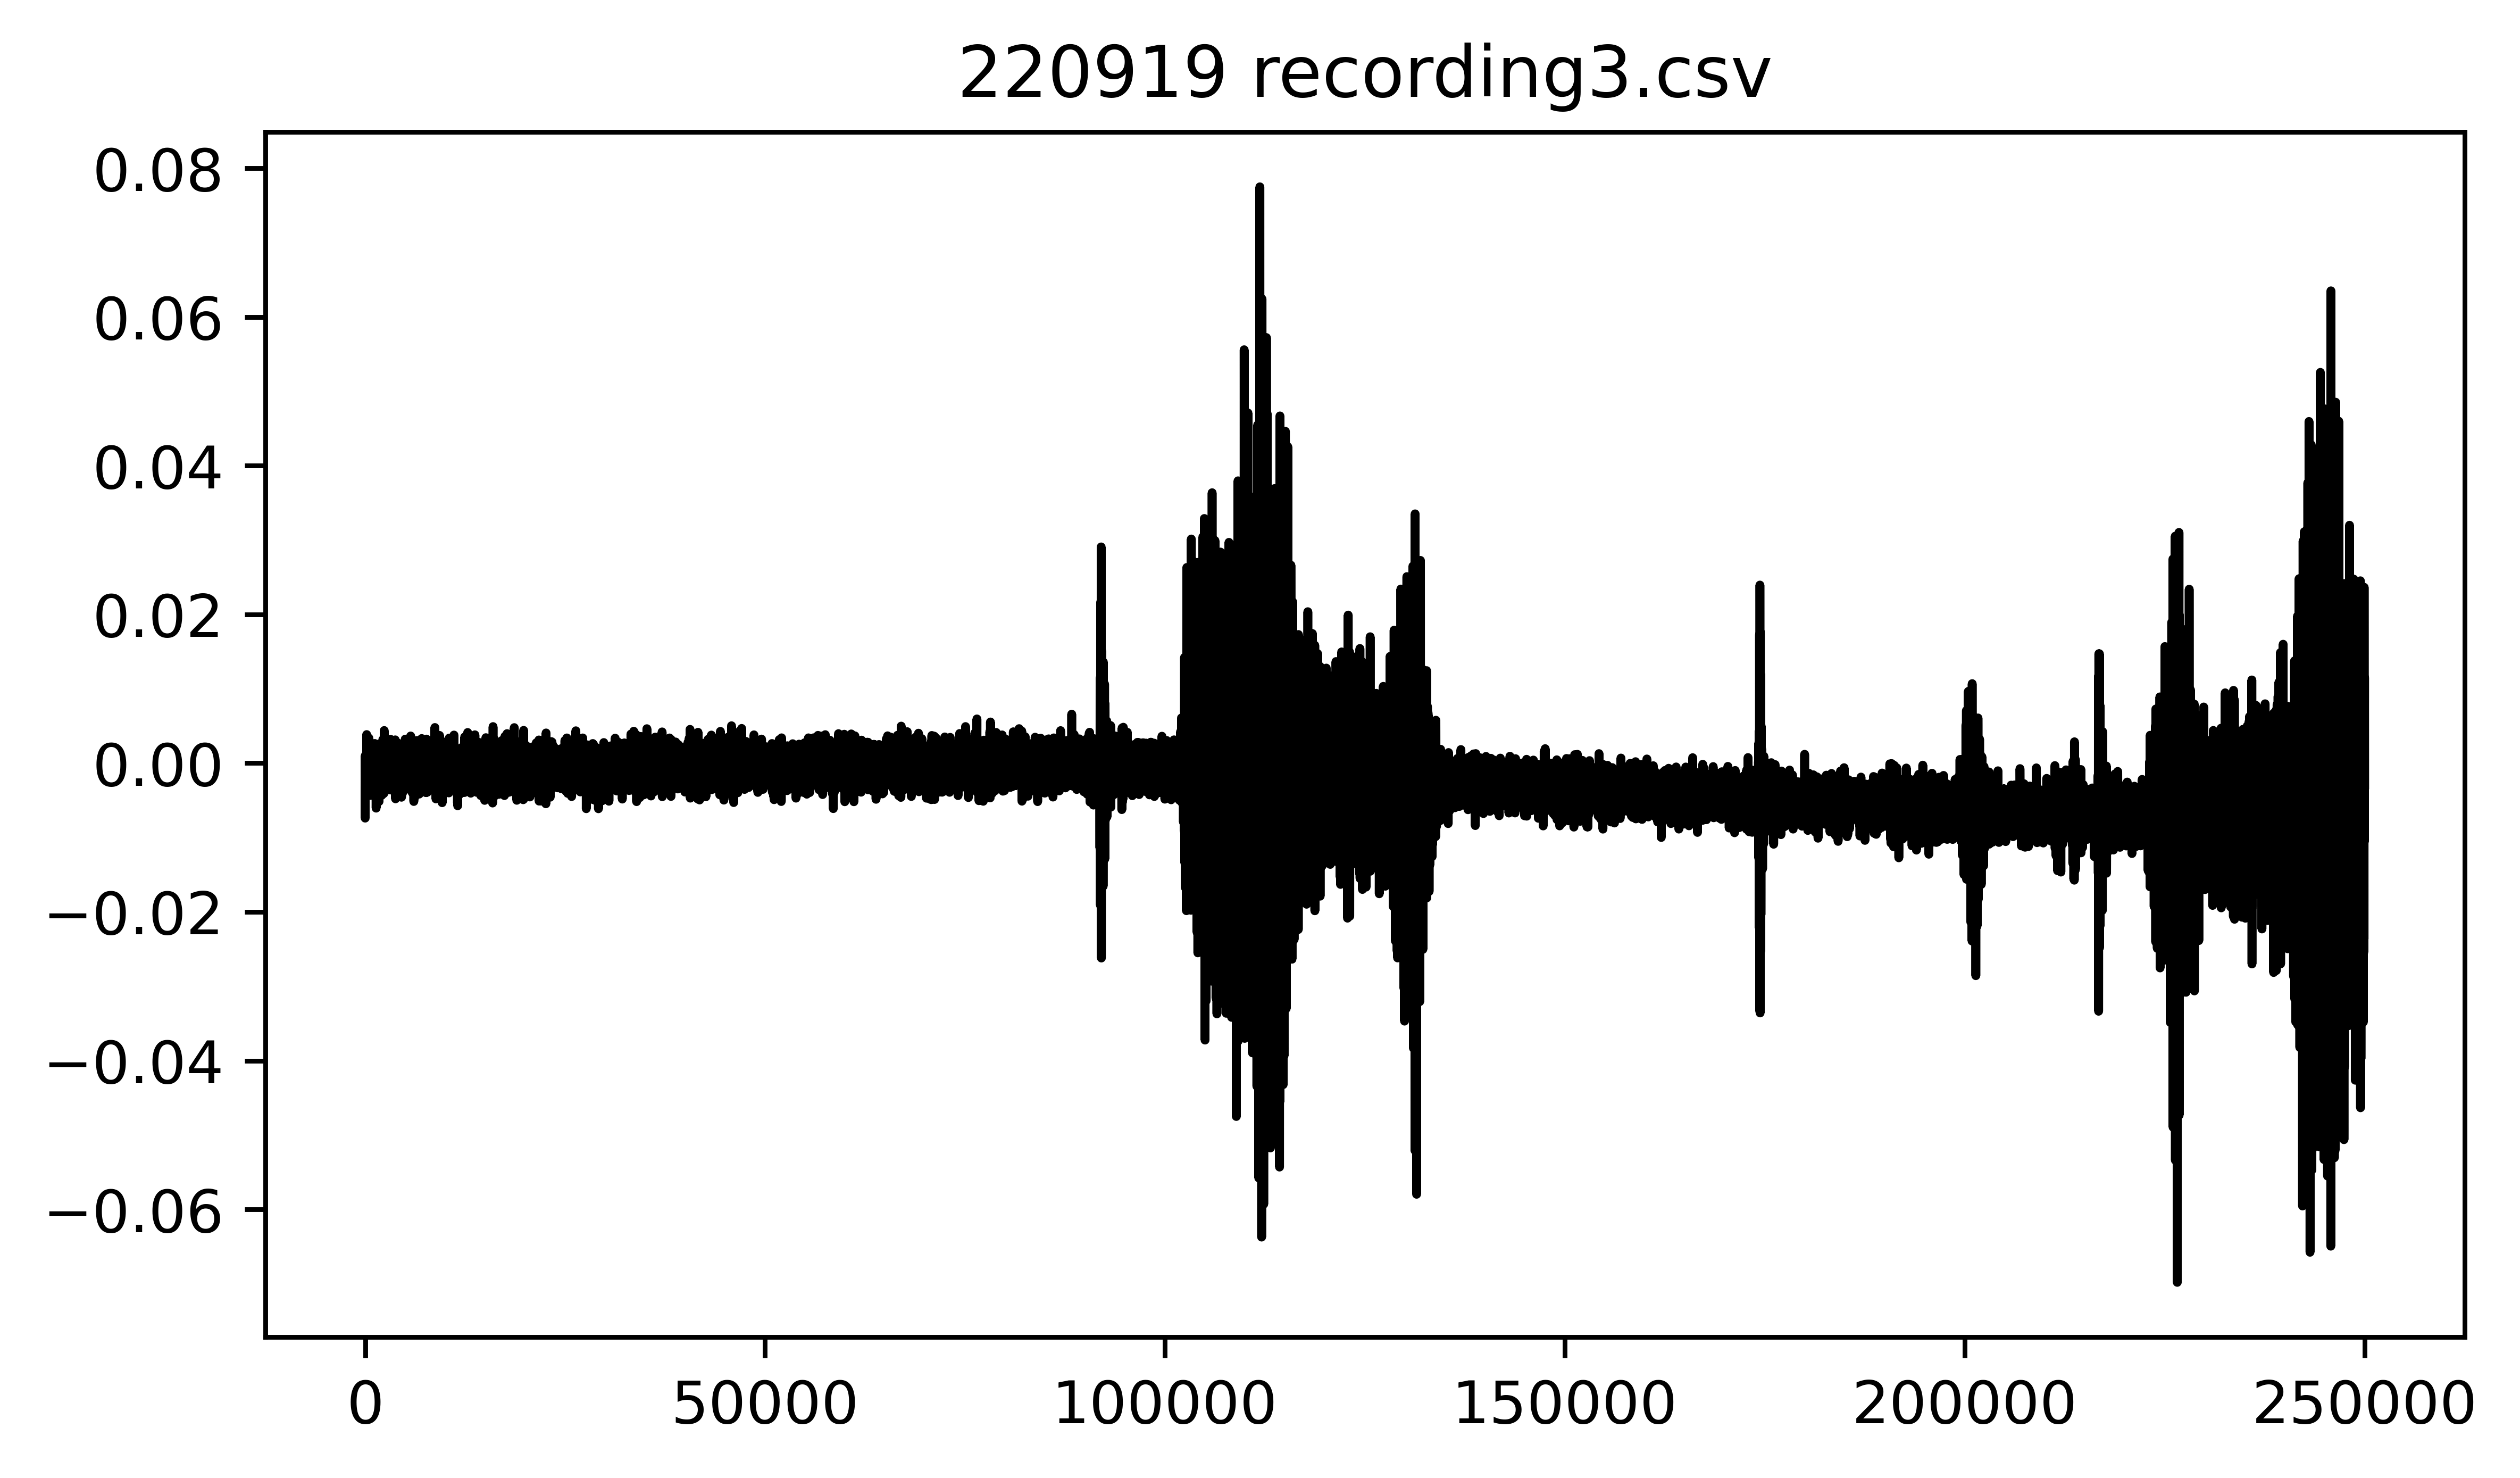

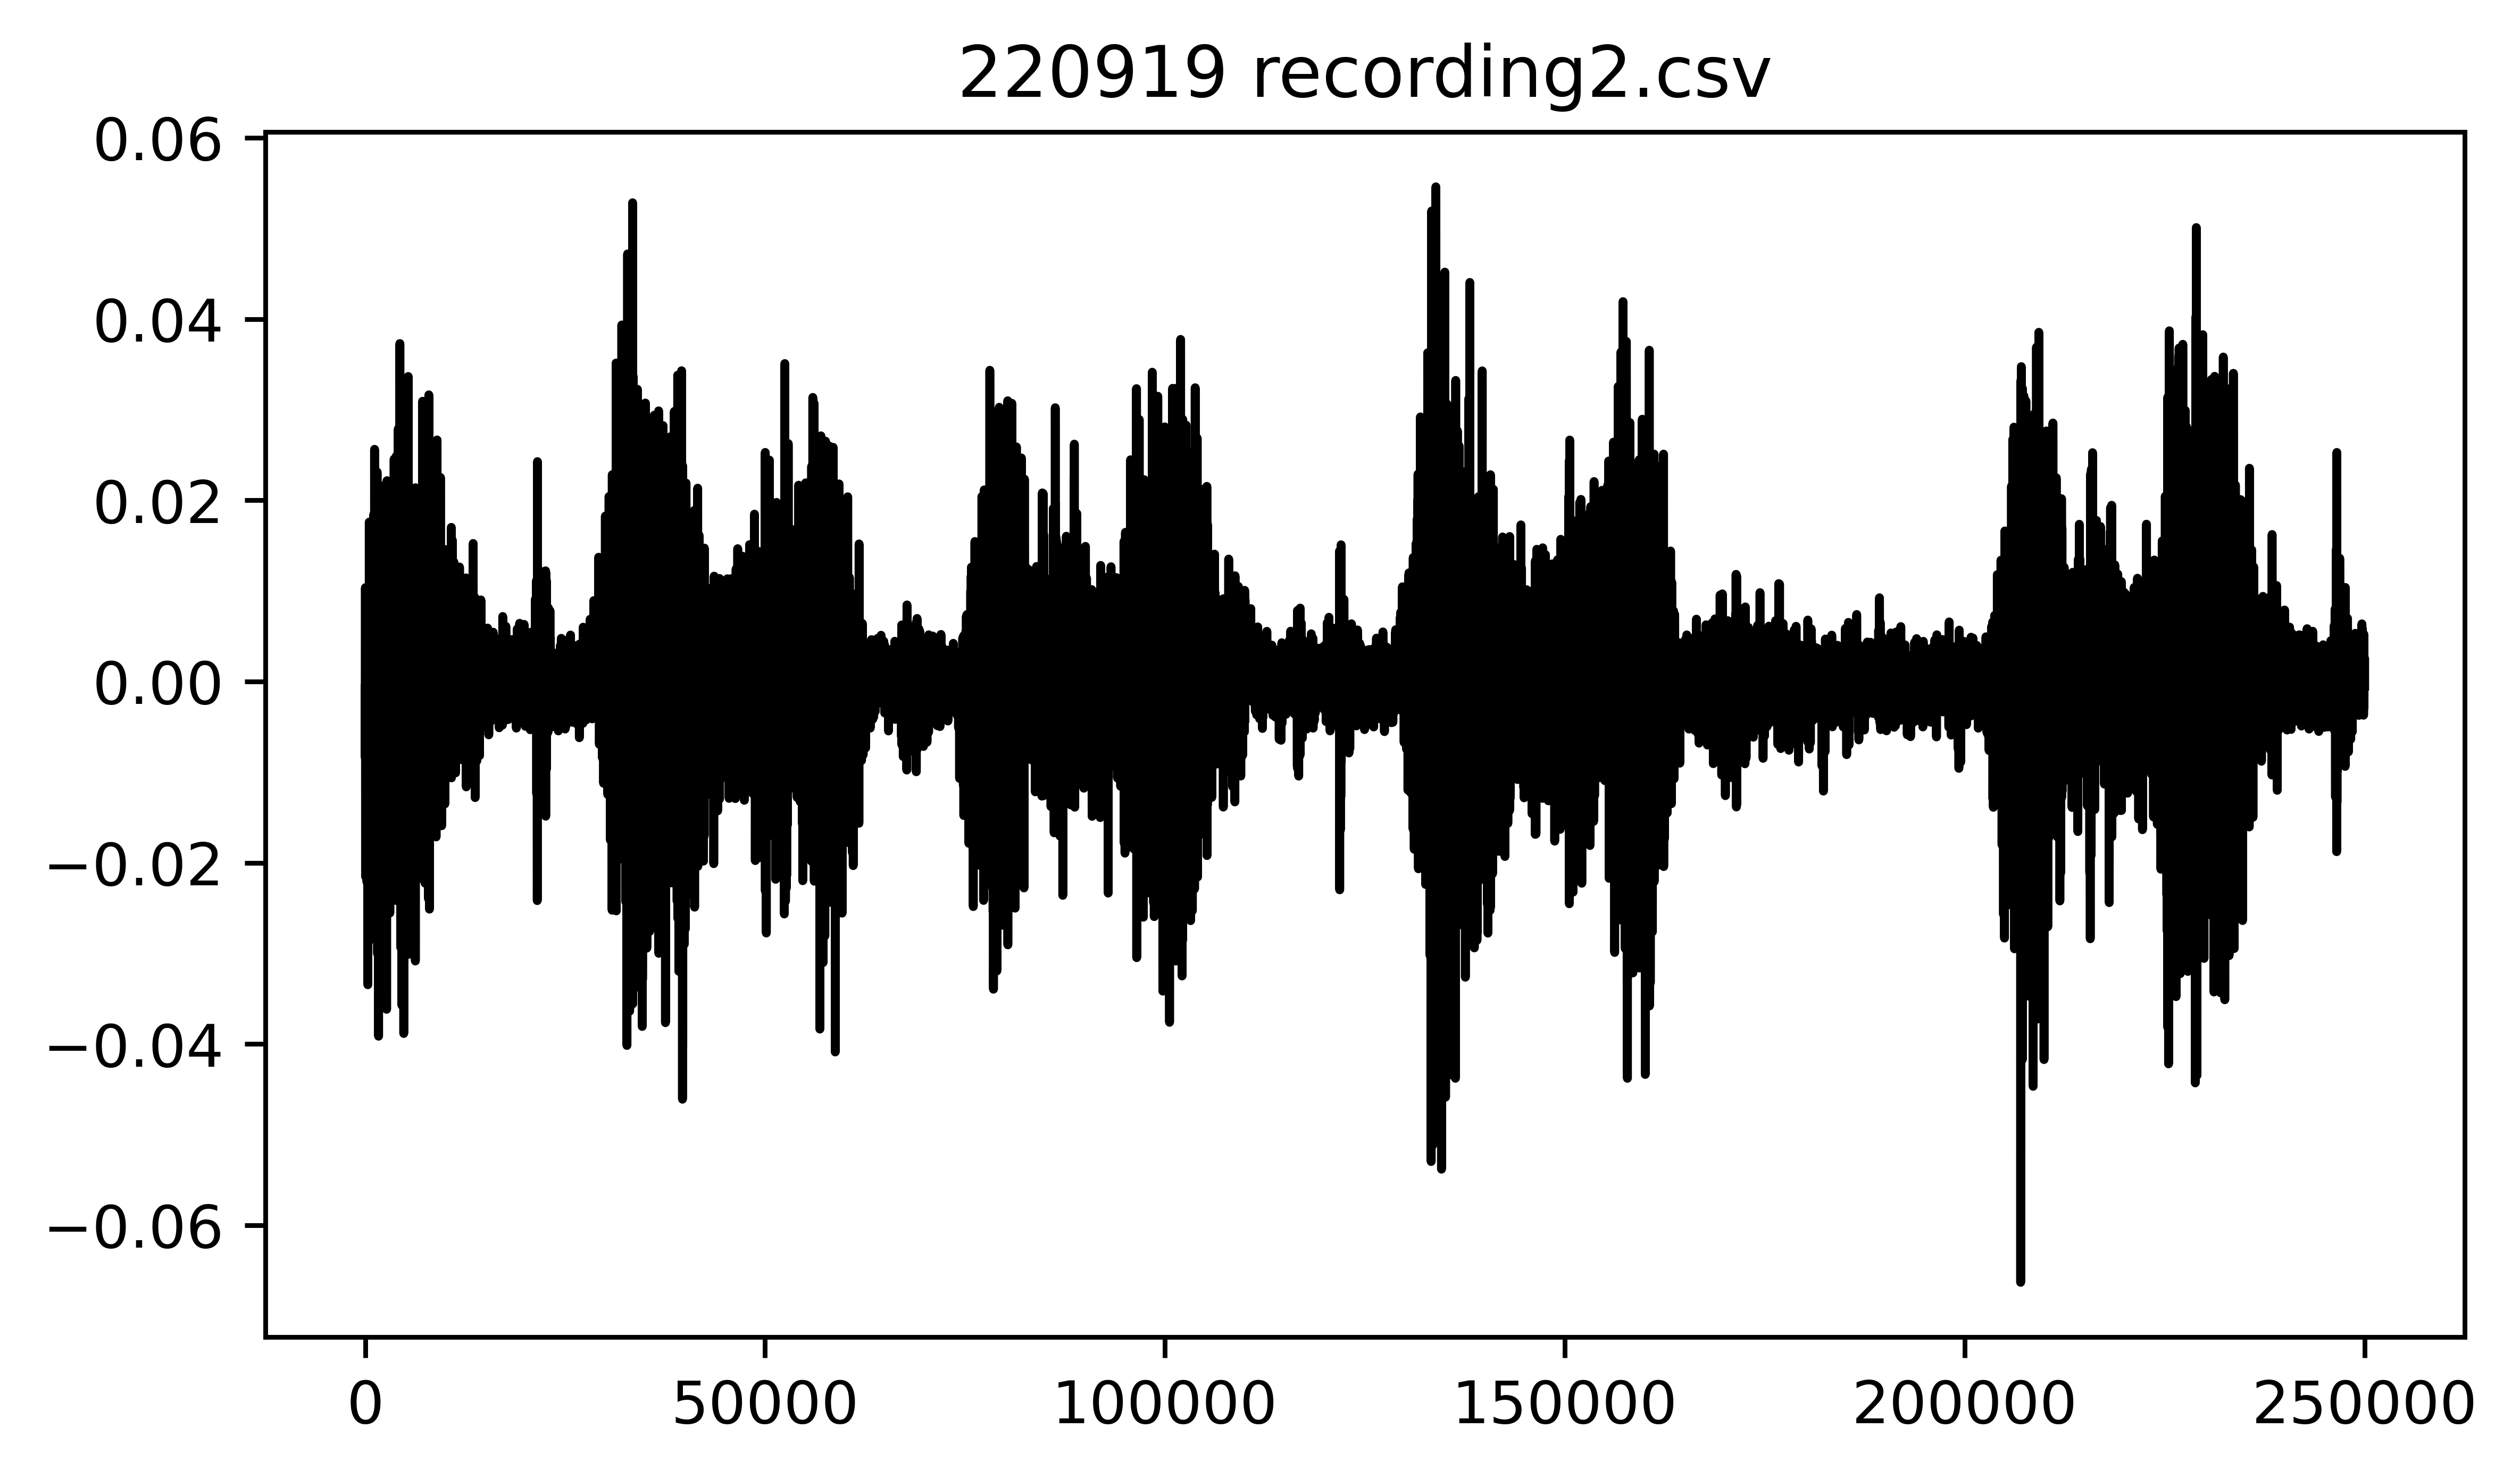

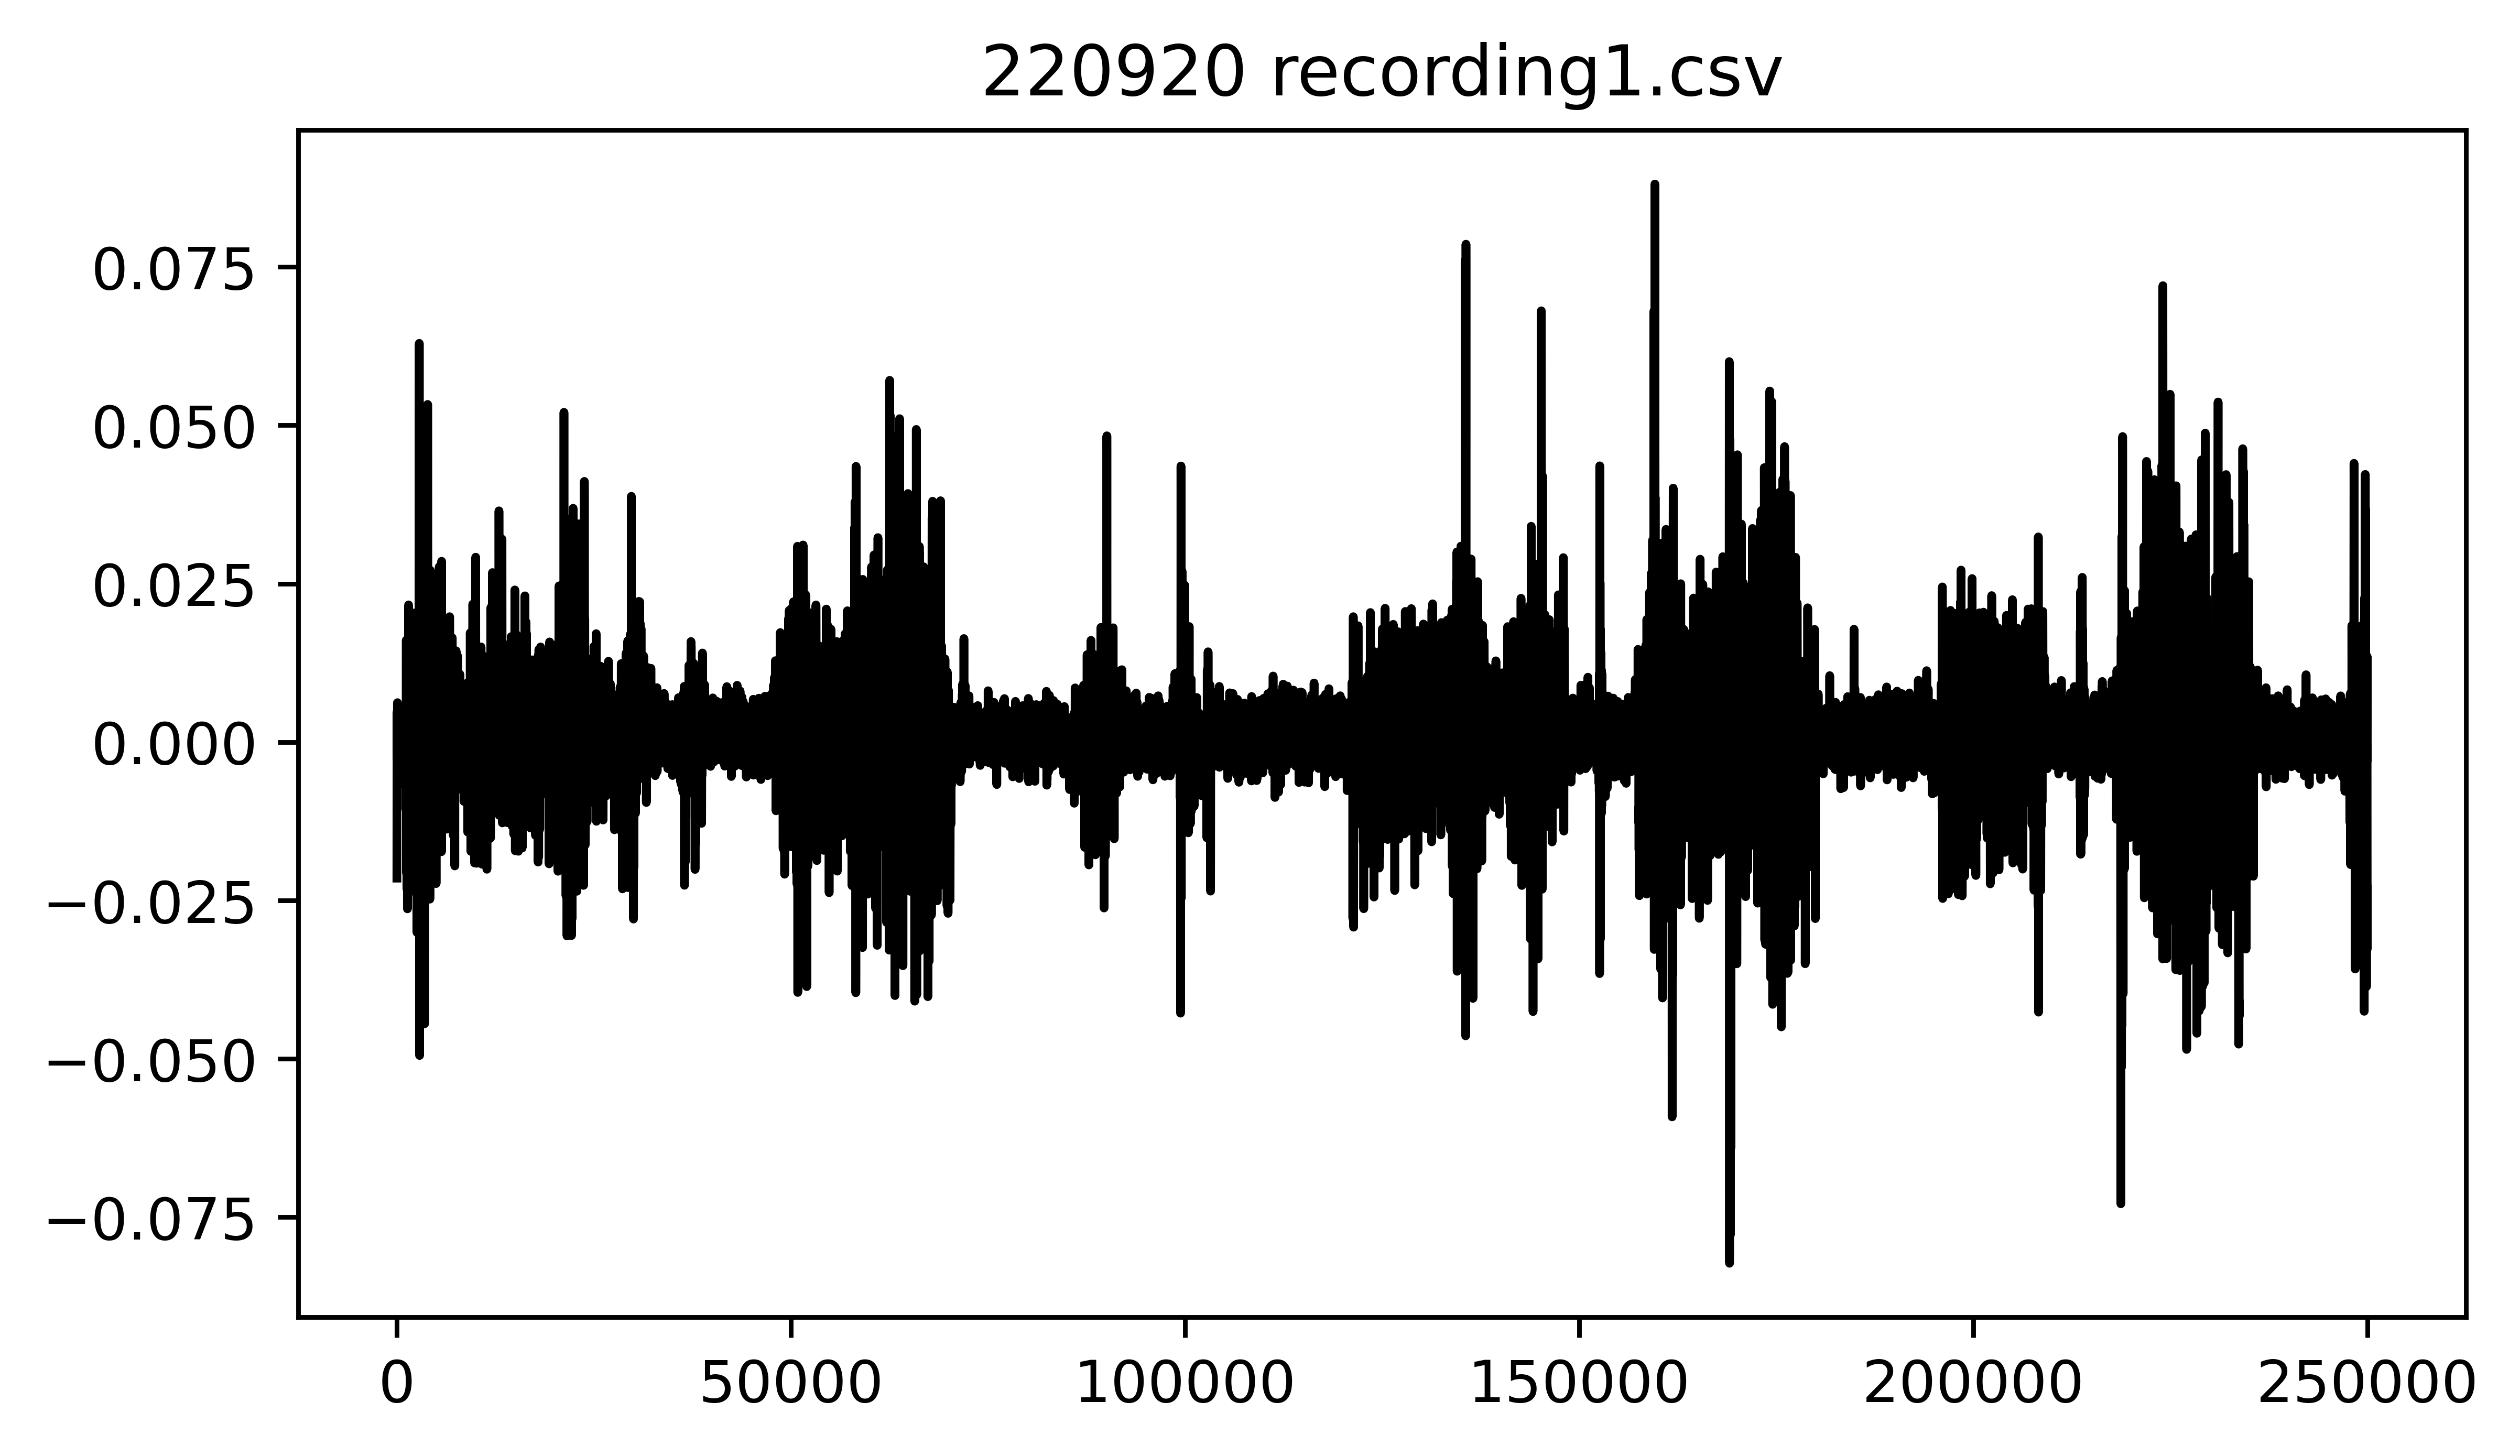

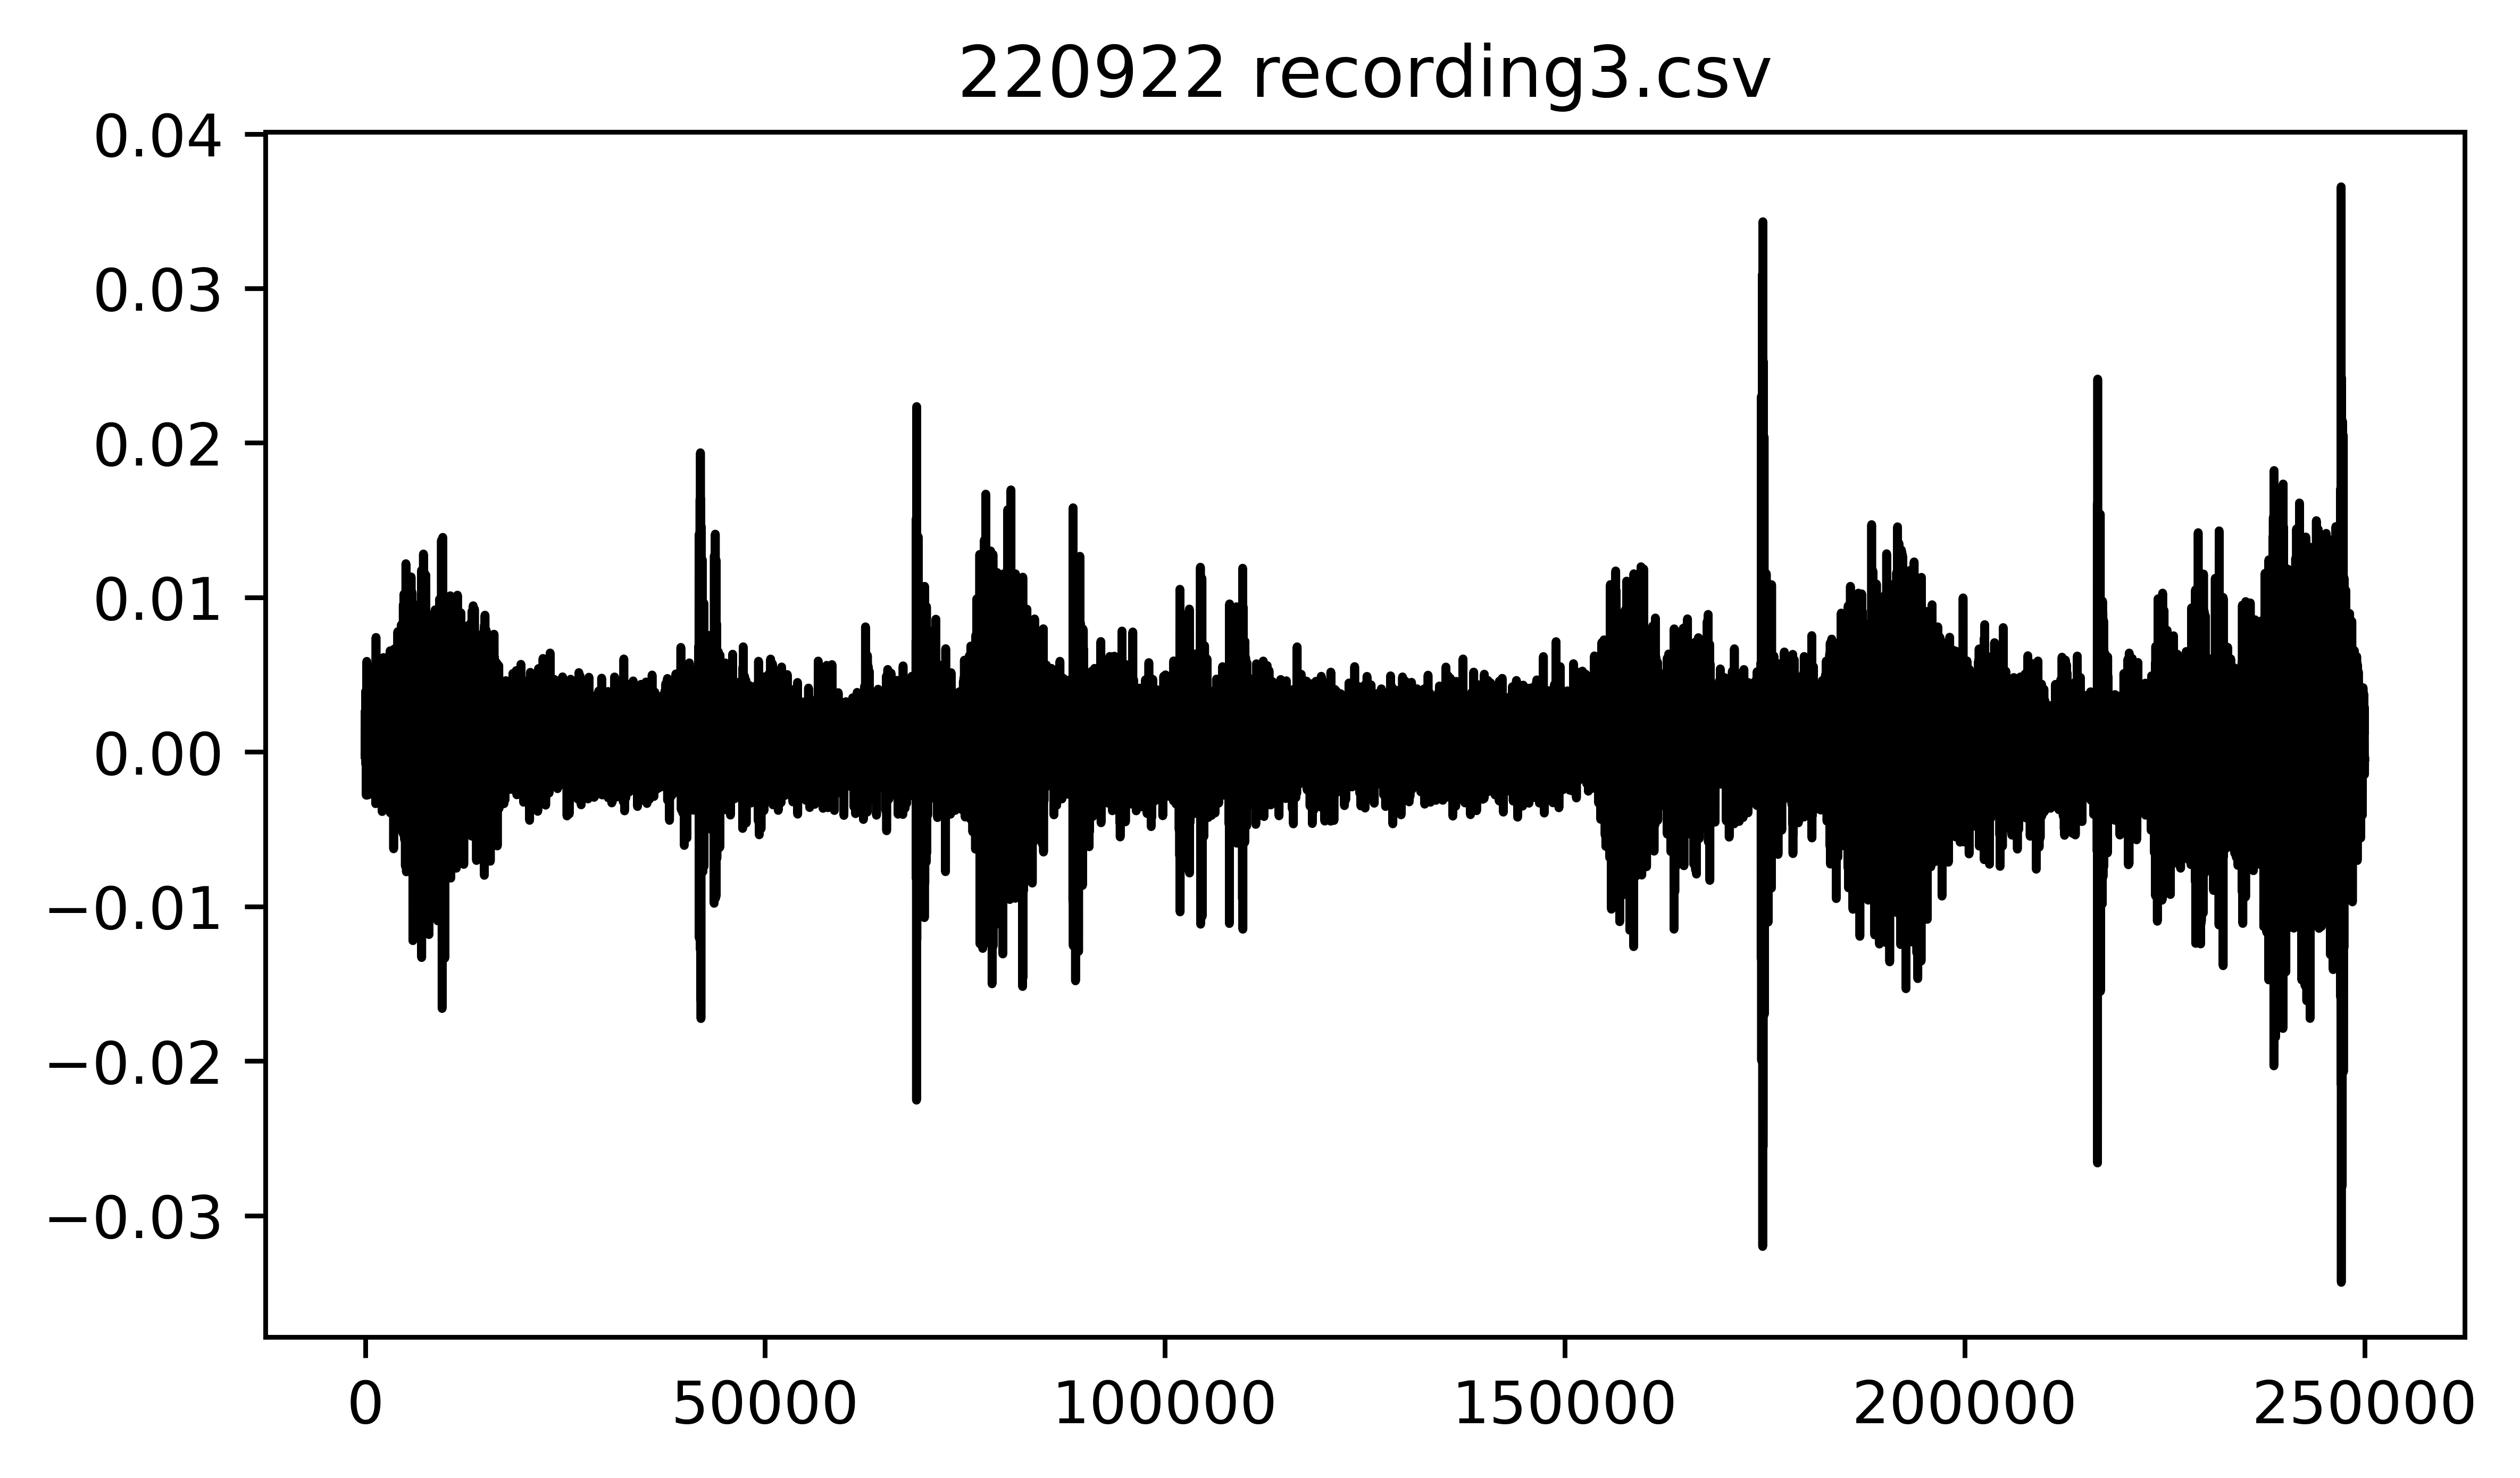

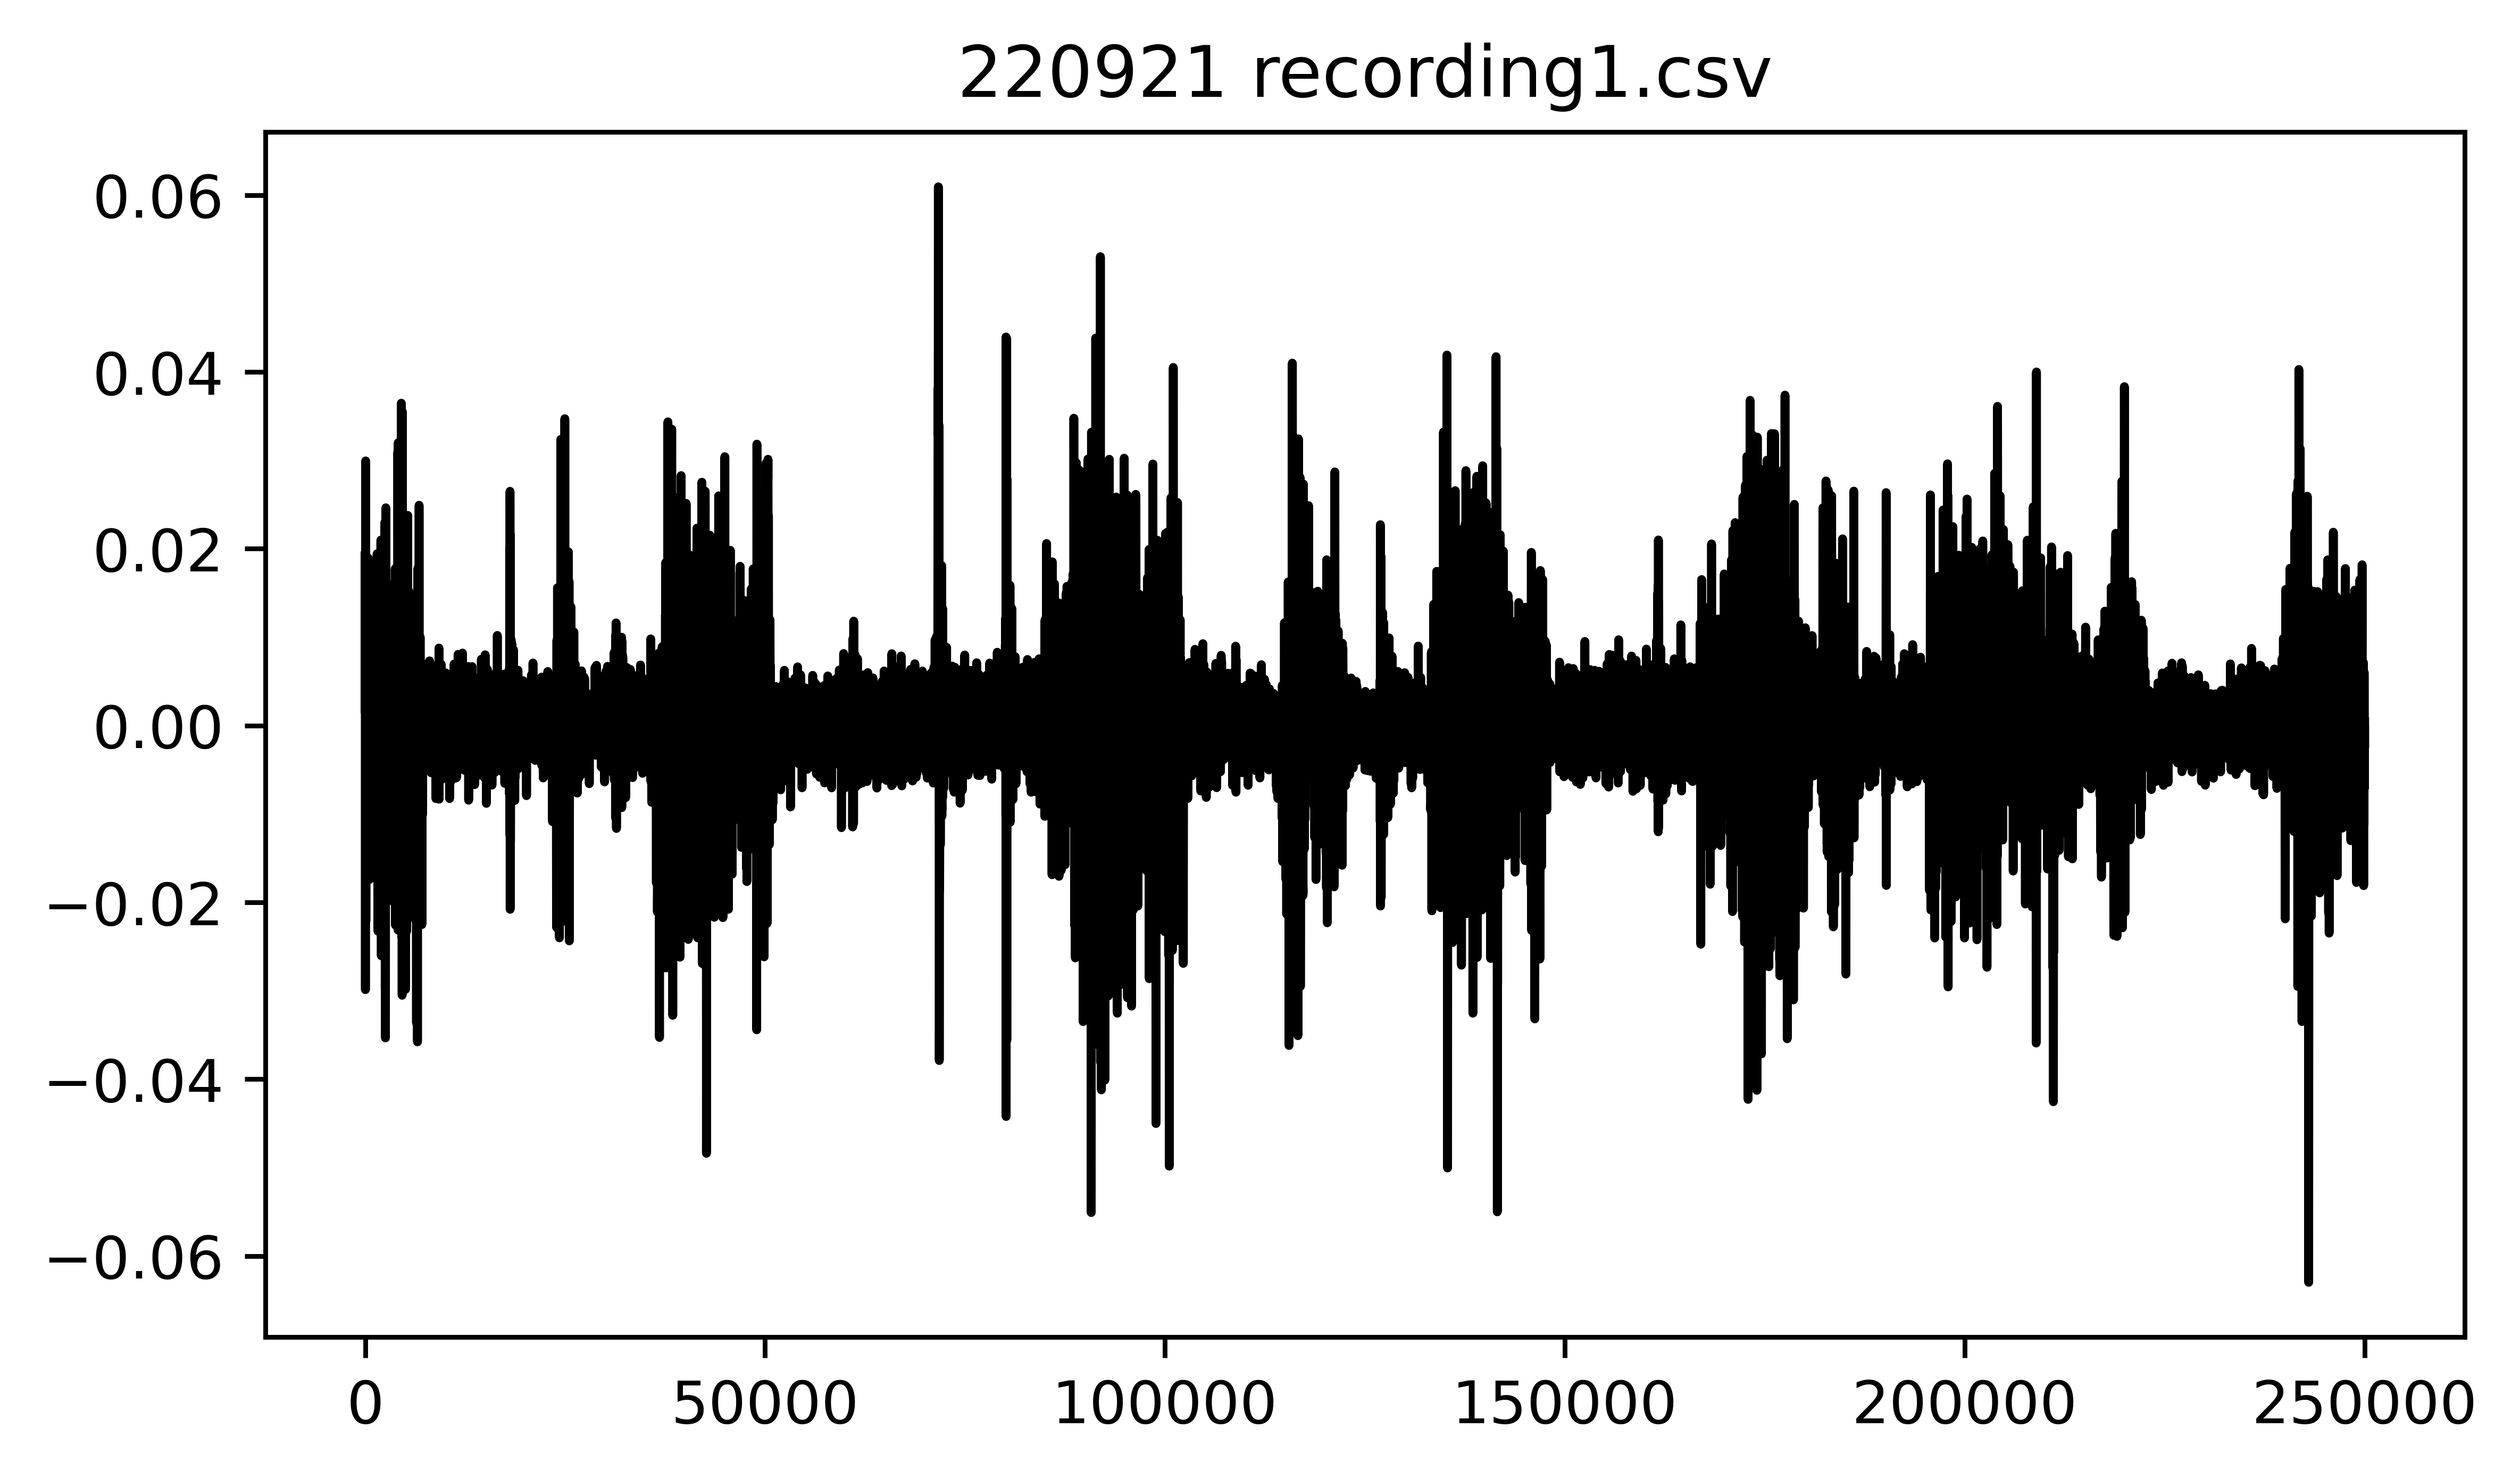

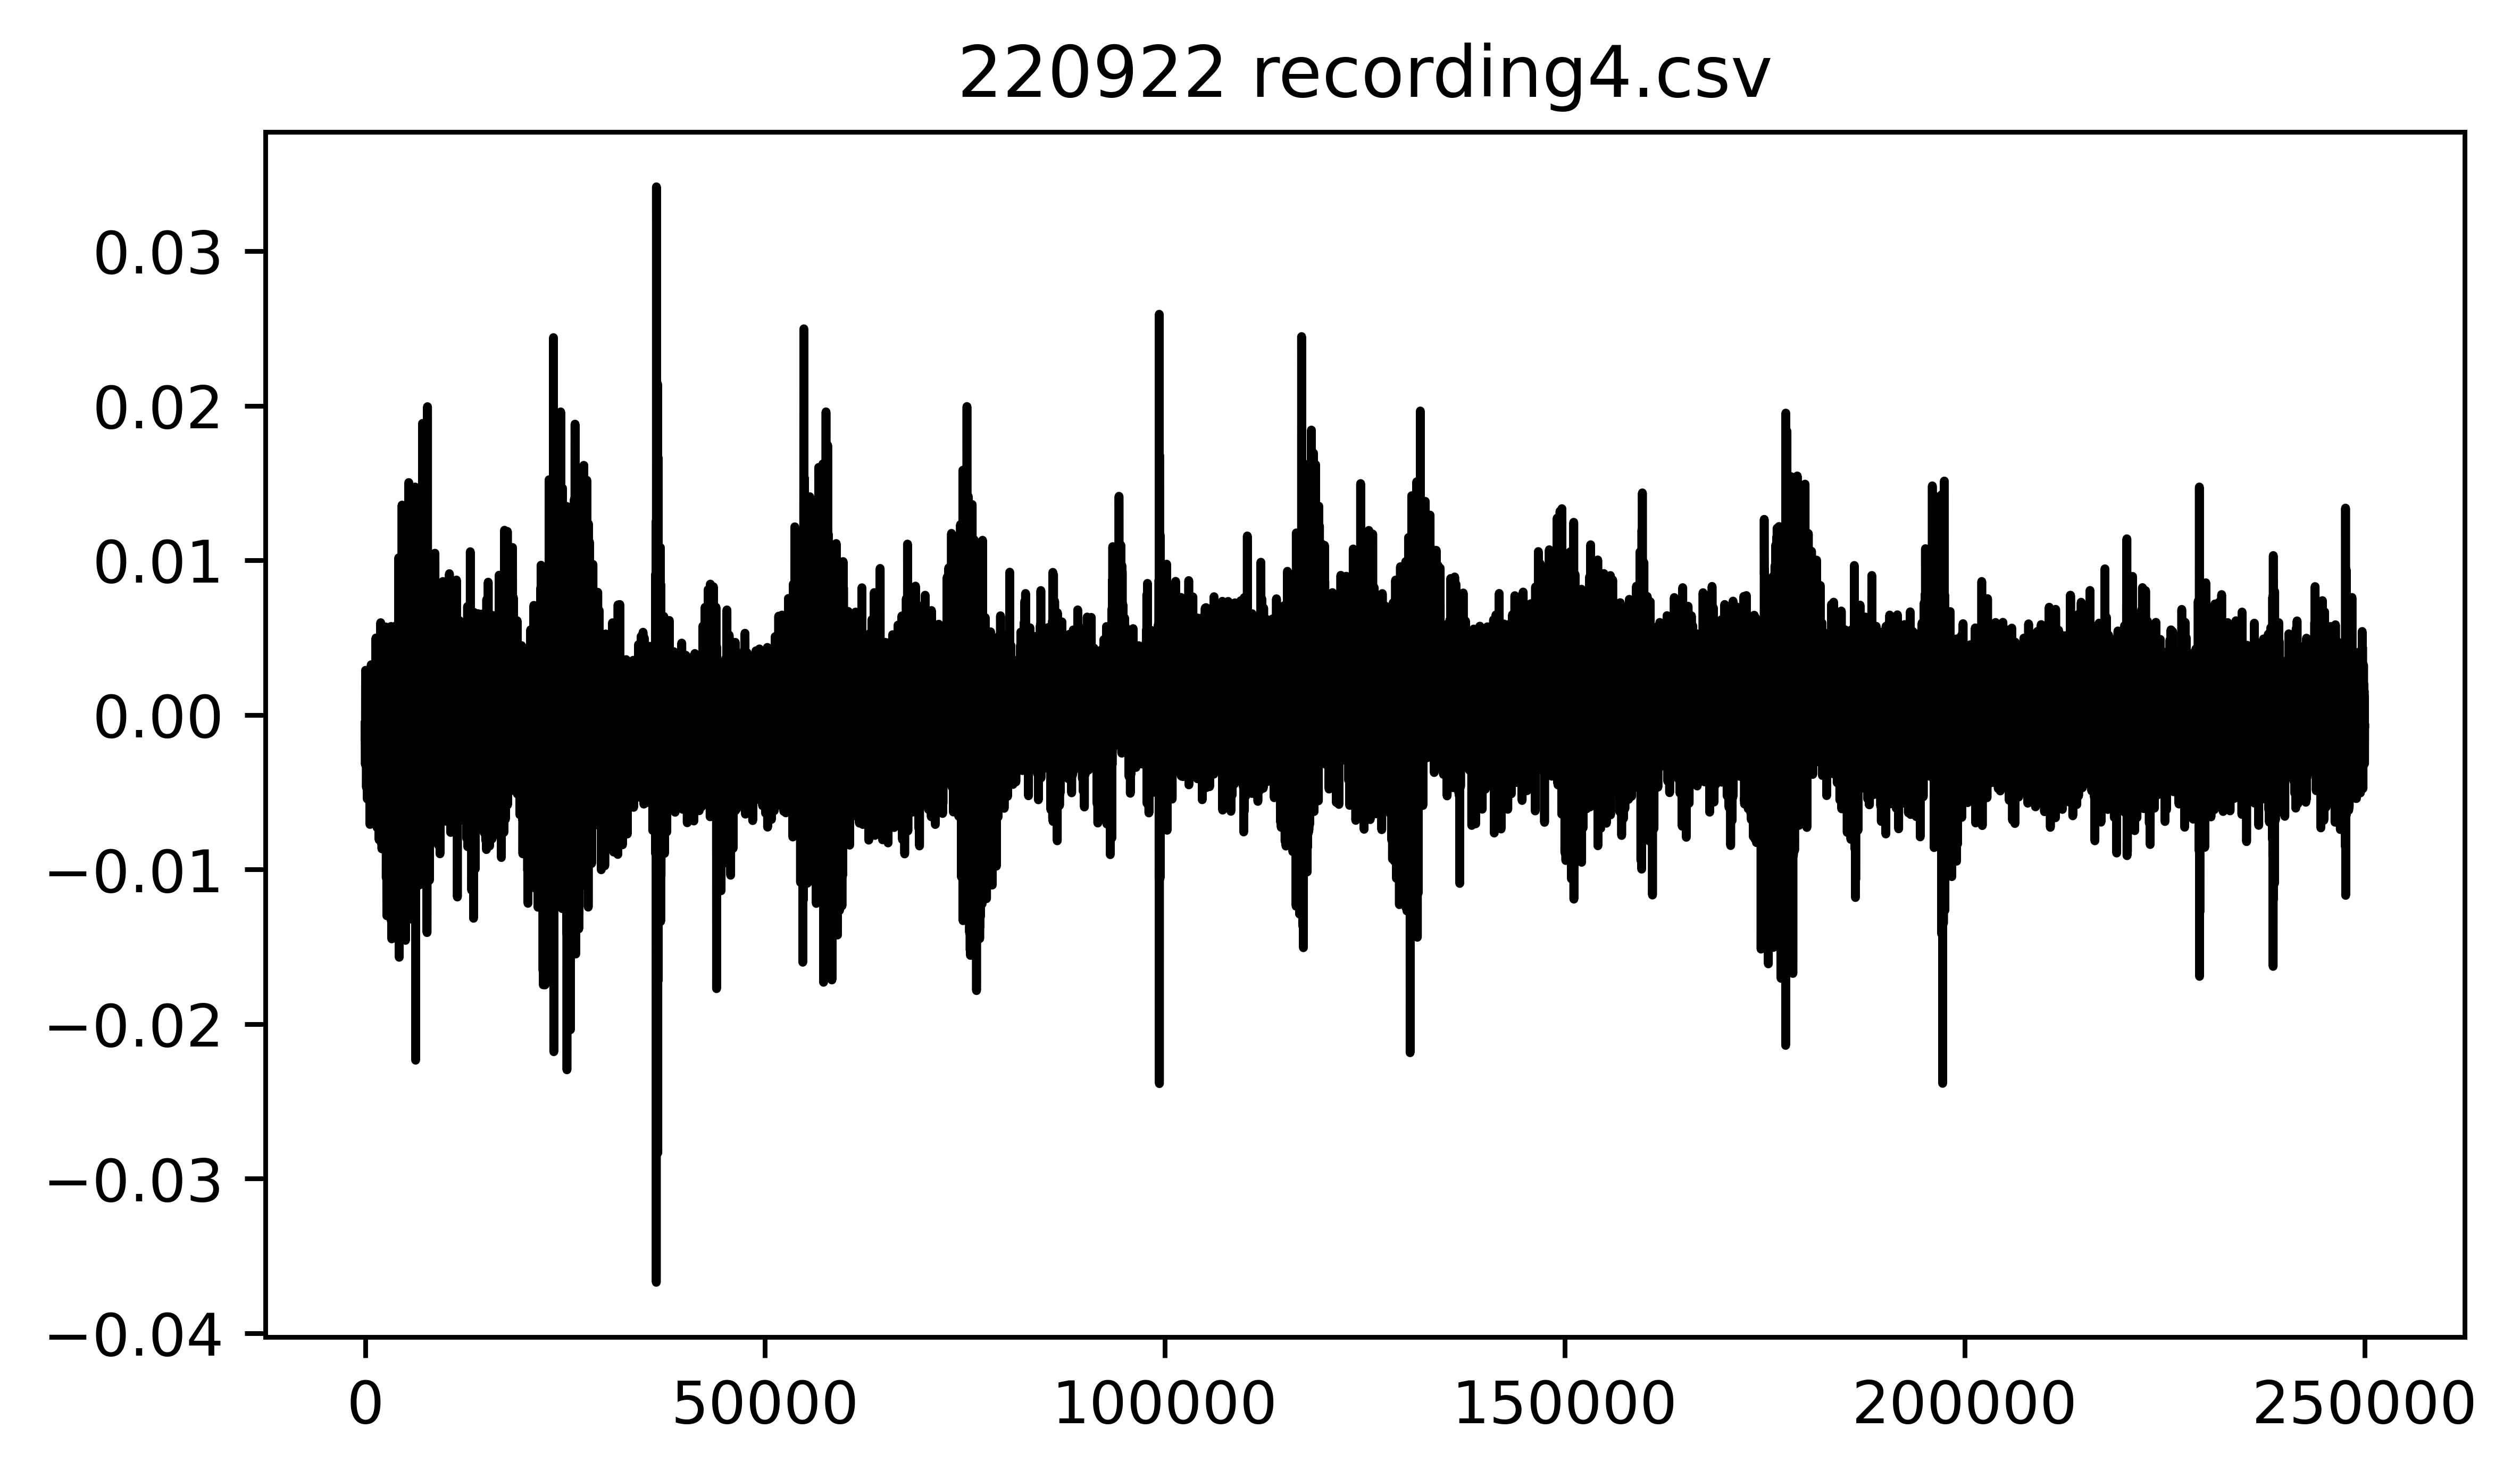

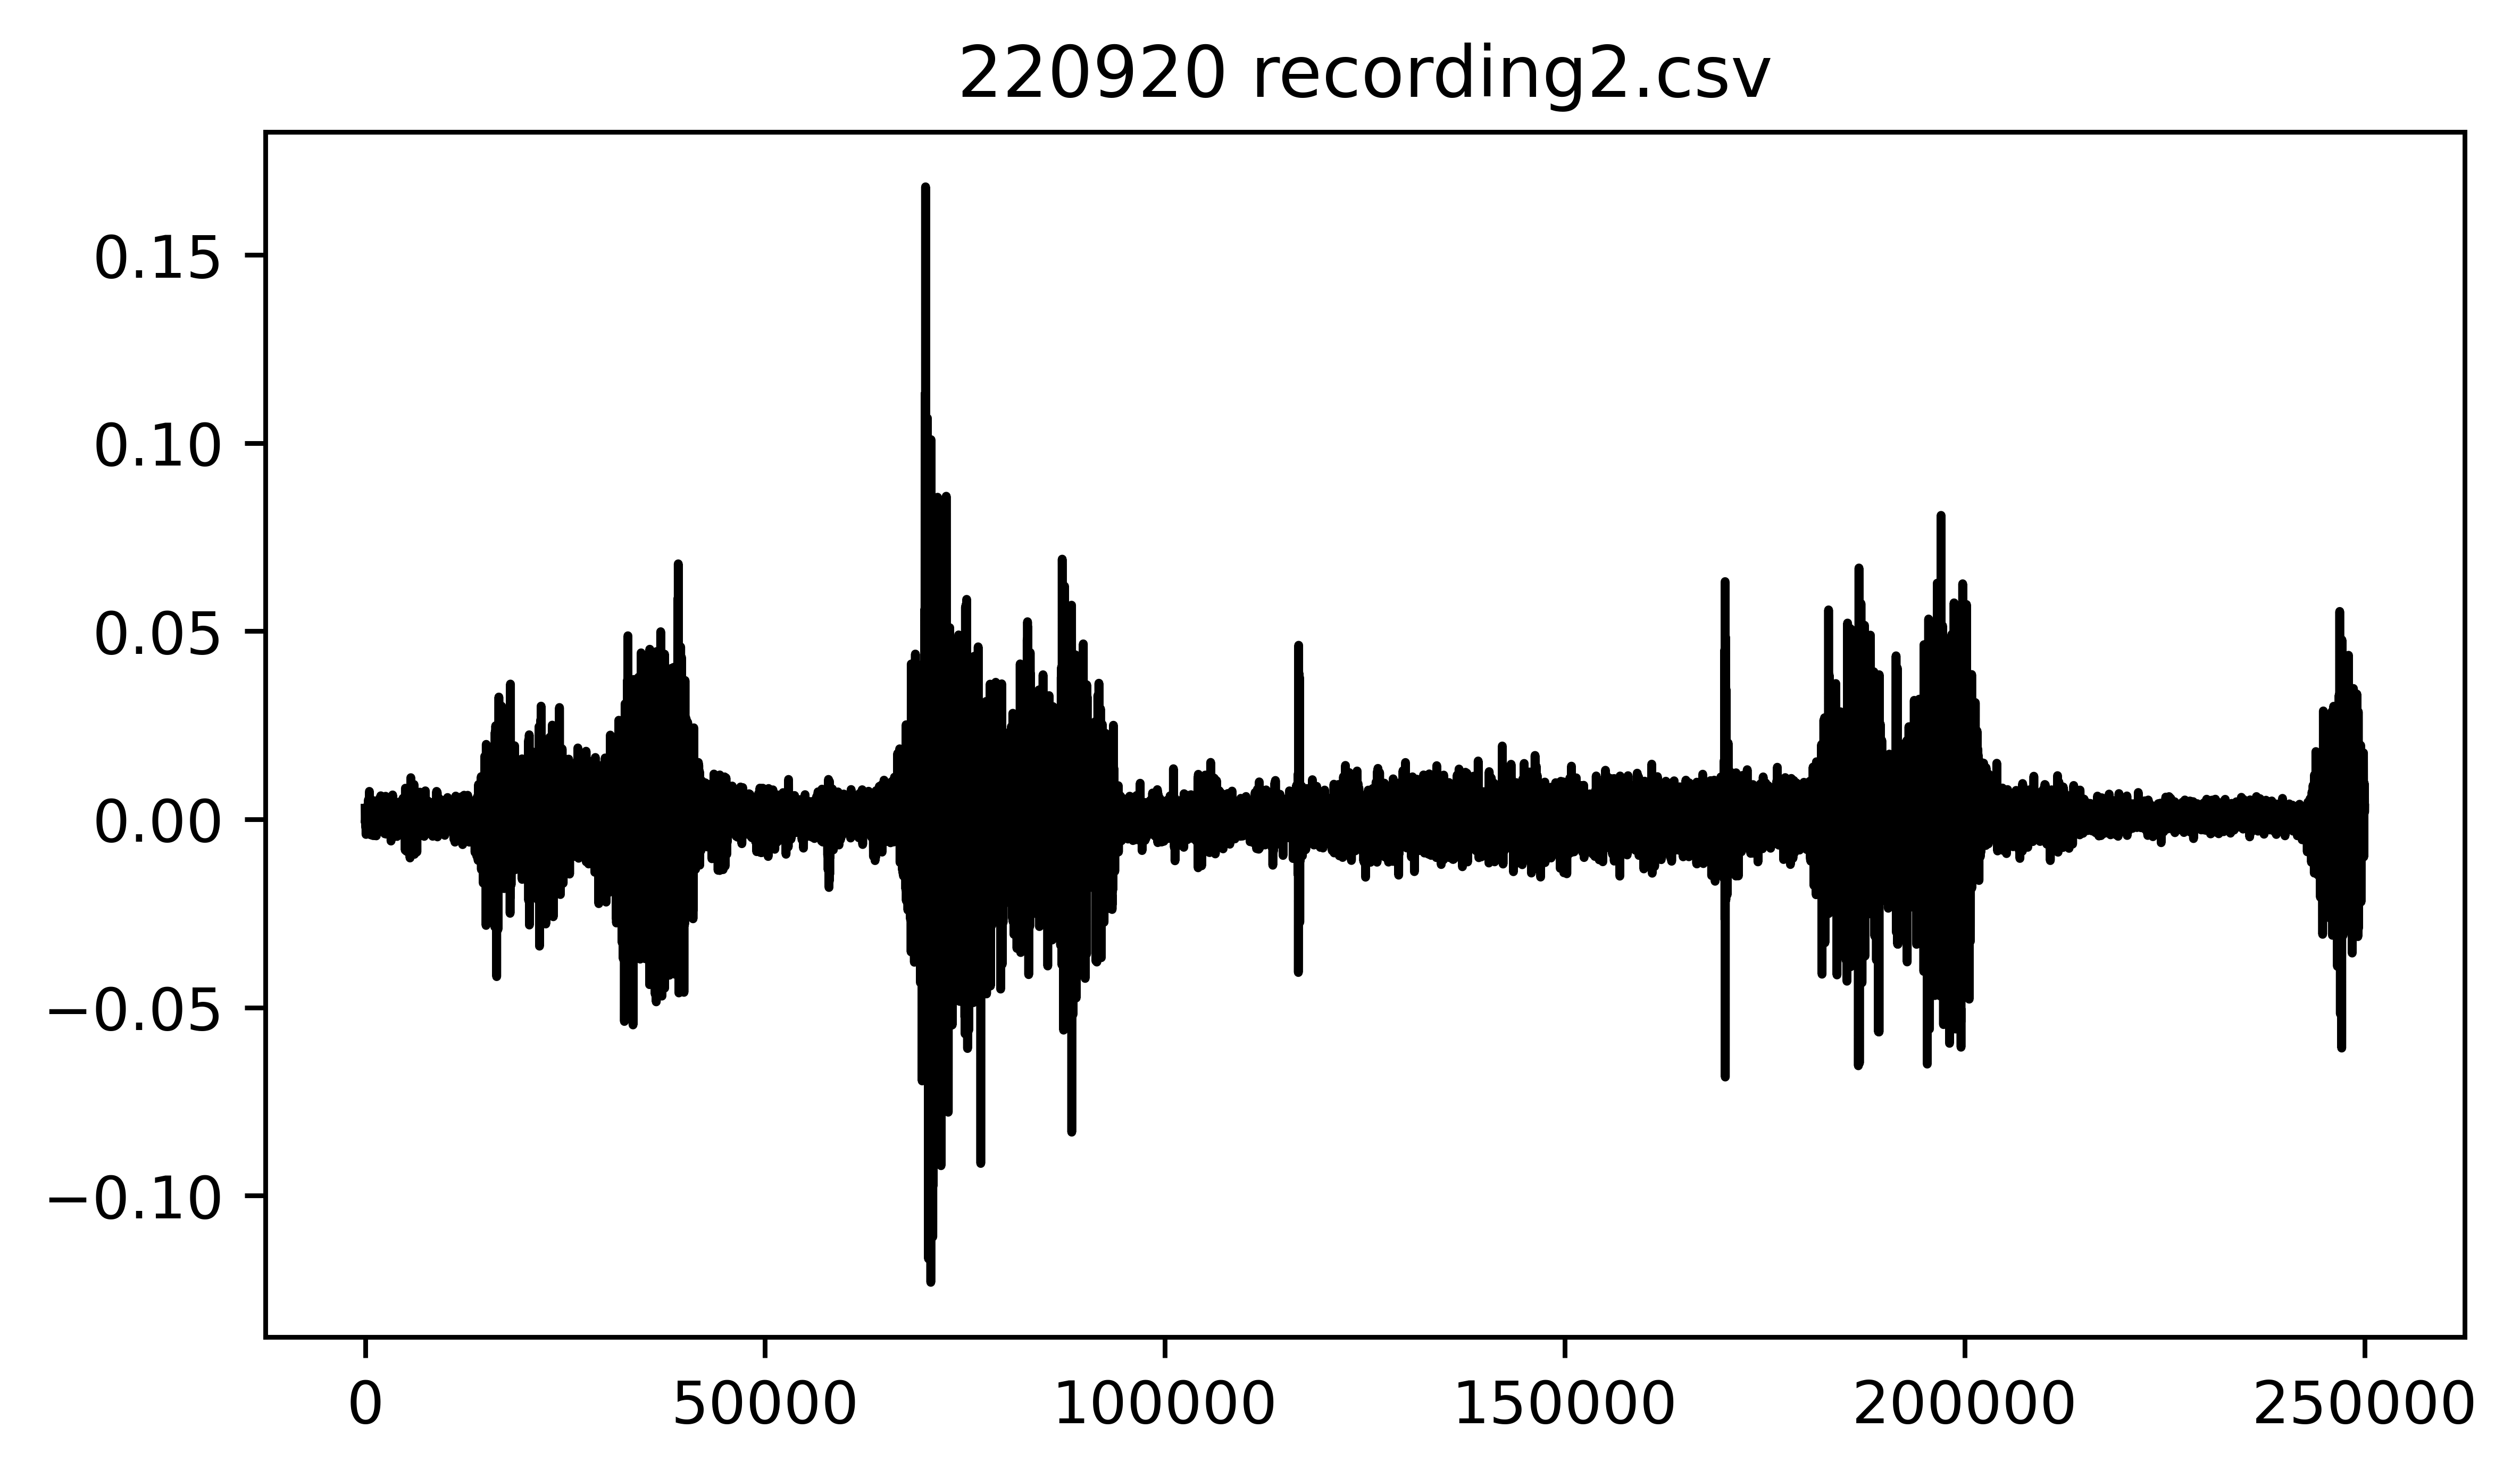

In [73]:
start = 1800000
span = 250000

i=1
for i in range(19):
    temp = cf.Smoothing(AllData[i][start:start+span,5],2)
    fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.125)
    plt.plot()
    plt.plot(temp)
    plt.title(files[i])
    plt.show()